In [1]:
import os
import logging
import json
from time import sleep
from IPython.core.display import display, HTML, Image
from device_api_notebook_helpers import *

## AV Studio authentication token

AV Studio API uses token-based authentication: each REST API request must include a token in their HTTP headers:

```
"Authorization": "Bearer <TOKEN>"
```

Tokens can be issued by the team's owner or admin. Multiple tokens can be issued for a team, but each token is linked to one team.

Tokens have admin permissions, without access to tokens and user management functionality.

Tokens do not expire.

### Issuing a token

To issue a token:
- login to your AV Studio account, 
- go to "My Teams"
- open "Integrations" tab of team for which need to issue a token
- enter token name

<video controls>
    <source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAA4rJtZGF0AAACnwYF//+b3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDEzOCAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMTMgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz02IGxvb2thaGVhZF90aHJlYWRzPTEgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj01IHNjZW5lY3V0PTQwIGludHJhX3JlZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAA6jmWIhAAj/7wwXU4HfvAS1Bj23tmI756lcVQx+2XQxyQPcDJu5x9duzt62h8ptR2AeVWBzoVQCUT7NKnQqRAJS4odqL/yk46SZ4zxRRYHn/BfyKq0SgeG1F/zMXXw/EkCc8NgEzkfCHHczc0CFKHc6CH5CZNsKydtRXgYaoZOFjzf4ZcEt1fBukNM/UeAabe/hfogKb432c7Iqeg8sMPA/RdOMXwQcbnZ+iXhB2acor+rwg+K6Ii/aaPffPYsJ2zzjEwysv4rnoDBnTDkBrmrql6qZjxczmZzqozjvFg1PRgEBTxaveLAbZ+lLoi/V3rIDYR7hStXMvQ/Wa4Wiy2gvMLhCBPCi6qDKjkgUH1xeJEcbIWjRwUBk0LSh2mqp9PDkEMYnOza9zrQXEm0B1E6WGTjaehirF/QCNK95jNG/ZZQOcTOaREnIgdZKTXOrWR6IsdIgF1yhia1EjaYlmgv8+J4ZCoAyn46RkwSBNCdM3GMIdqcrnCmSak95oLPr9L0693J4a0UkBLB0fDrfYpoN9roEsphJSylxw5YDE9e4HB5N/89hkKe49sYODpGnYyB9Kaeic8BGzxurPOLsGzzdMahNkcPVOBrgDki7ZHhH59Rf7WqjJykX4qbg2+s+fIQ1EV8G/9be3ePykMJn4sQolU2BqHXu3WPGnsaZevO3smyDkEAqmOl+QpCBK1eZNGaiDf+yujZBhuSjFaGjVd9sp3B900MxM2m9JTQk2leGwDHrtrcttrcCZrP1PojFWWoRQLSslZ1R0X7Ofah6XFsW0t0hi8CiYpBBwly1ivVPuGrbE8JrdtFadSygpxuyVyxeE2cQW+smM1oUqgcbviwo9V3G15PzUP7QhoXyrKQlcL6HdHor8cB4jmM3dONTFGimDYwdLmXj+uEPM3J8l+obI1FcssuCsZAegnMYrTxp9cB7Eby3f4JY88Sxh+E0S7kjcMtDwbNchtTaxRfcXde+qnGIV7p9uGF1islPYczrHGkTQiPsrHfKXStc/7QmPzT723dVR7uXHHwIq2ksupRepNkOnRhKOuSUFHrpNCqsceHYIaWN2D8aV7bkGL+lGHcFZM2gwvRttoLu6Pb+94UgWtOXfSv378nvuq17FVtJiJX47LWAepzYzTGHlqr3CvD/WIBh/qo97gxUjTqZZjbMMFKmpA2OkwHDHGABfMDOIy7eKLSkBEXU09i4XcsBf3P1GBic5WVyQ5hMIAJaaE//60S2whNOcEwUkrOho1QgyJO0V/Ary70RRqFW1D+TlUa7ayVbcigKnEqPTv/2hz5xm9xTY4JL10T7vISux5WcOv26RnxKhz4Y2KLdgS9hz2UKYDP+X2axaP6ozoMh24s9MoA63nJy2poo22ML+ooNGCCGY6hWjm0UExdLRa5ED7uJEj6ENvjdkRjifnETC2zPNFfteQsFt0is3eVF5zyt1Bsrg1xl8Sj32JW9iLSiu7D003ZrqObiplCoN9SEm8cWwagd72uVg7RB/zN3qMldLWSpJYqQtcYq8yvtcjjHfbaCkKN5llrpVnBL5rCvqlbScIDm9kjb80mjXnHWK53eNsFNN/i3GpO6OhlCHpWvEFQWVDQa7la/EKkU9b93xkv8hmJO8Dta2vbvIAXBZHbvwmMSbe9hI+DZfe4octYkP6JWpJF1PKituSm46ZgOzc3xcDa1CrhPekqyD/PsYyD05P/vE8rp+Ej4EmWnwHKEibuLX6xwOJB8uJnWpTdqYlS4hmujUYNwm3EQ8dRANYoXZogDWX0LV4M+6JT2pdJhiDHlgMDdZCK3S4UDX8+ZQN1FqvywkRHd++WJ46LWX5FW4gVkEht/e3aXF6EoYVovWmmQOHVyfwPJSSWK9jvPf8/2bWuO8dxdDF/rnP+pESI3c2vOLji+fEXzTnOBGjwYHLd64xd+uOHueBD0R3FoW6GsI1Inri6/XSdcrVUFA58BL7O1PC4Mk1L0KWKdJi18T9zgH9G3phB7mloa0KHPaT2LpIlw3XKnkckEuxI5U74VrAVBd2jhshMLz5CcPV3x125u1mlrGKc8MX64lMrYrMAKp1s7pd6hlY/VRtI+msKYD44uHTmXDDO2uruqOgOPYQKZPG8pyv0FIm3BJZmhBDSTvL0a9VMELiT4v4G8iv5eZpptEqsnxVi68uwe6uGkLVc8HZnGSk65GJG1q0shysEqbpHkpzf7bsZh2cVBCB5/tP84sfuzl8QUBGLnb5D9l2XxDVAkm1fYSUK/3yXwMsS1nMQJr6E6INXTpNAPrwl9xkewgCWq33pEmt6q5zxwvNPMRfe3SqJ4AqfXqq6wLXWdi5wKbBGGfRu3lsnFYN9bZzkd9B9pJmk8fVhiZVeTVlMqyVuODKaHQapwsBnWXrukTQpbwGD7TrzQGhCsCyIC+0wpjDOdRKwKMqUtC+Rnnzub8doykClucvO5nkH4tiu1Josj8KsfGA3O8ZPgRzHtuzfV1QSTUGewFxVuBQ6TaTaNSzMdbPqoXcpqpYr9dDJupZ9pXqT5xmsRH0g8HJvJqodCRA16lr2G0AAqYOv6VvhlX9fkv1g/tcikC/3Bgt80NkPnOMyyxKSMxiBa1j6q2Wh+GtrSDt2YBdd/eAMcfMBbJr5PqHvH+5ks8+AYVGjOQ415MZtYz5HnoWbm6ngJhxUtKJCY6O+RYiqZ8fnX5I51UXDeVYhNdfoRXyN5ZawtwYxgUuNZosjIjiCx/ZjArfoSzkoSjiaApePDghYbC5a3HkYI7CJCecK/E2dgOhs7XwEr9djExZzwVrPadgMbBfEXLUbI0T4lCEDZT6S4L9dg/qvj6pUk3iPWqtk7+AZ1OMHRBAS3N4saemG7Ih0sim5OiWK73XnZ9P3t5jDlGCw2AIu42bQ9WpIYQz+jGWM+XpKX7IR0og6NZ1CYF/1mi5G8Ff4Zh0zaQ1zY6kVYpkGd3HrIZg1njRANdCM8j9oCjcJJ147bheYtj/UUXLMkAXlFW4vss+r8FtkuhWnBrBf8kuFL6AJKj/u3YbEaBguaRtWnBmPuP4G0fB1kB9C8HYGr7elqRC/HF7goMqScccOuPCBR532fRN5G1zDwEalBKPyvubmLPjrp0PUwJ9lSvWw4DkN+4RjA9auplVPiWYKyELiEo+CXnKsnzUDN2bon/hkLmw2gdhxCI4qXW8Rs6UtFjjpZ974Ubn1uba3XxJEhYCrSj4ZQYQ+Q7gno+Vk133/tkRrCt27/D+Swlcbcjo6jTaJEYbLScs3hCwsZslbgimU4JRIfdjYnTrdYJDw4bWr4IFPpbYkqIue8oKeB5P79DyA3C62Jwioni2PVeks31t8cjBKh1mxysWYNusmyp2TZaSVAde7GIoj5/Ln6aSzNUlHBM14vPYZOtW2LpV1C3SPgP52CnDU2/VsGqCD0OsTSmH3druLBp5bUmMIUaZYGRj1MjsIainhiR0TQ9wmewRdgJpxZ6dGfa6Kz8S8Y1njJv42Rw1OjURc/Y4crWp/mlMR3CFJsJy14Sz1wRYVyHzOE6lRZecFKZC5jy2LJ+jmhzONXQ4wMaSRoZs9O0CuLr1GpRycCNCzvkSgTAKs03GAlie0SFsM8ZvoekYNqFp311XwDgPZ3NpPGKZHQ24dQFjhZf8AKmbII/LNI+f1eQiv4hik1NDLK91R5CF06YMxGAmSP4jZ5DUSh75xPKojRBIyOuDazBqV3Srg4BfPsrCHkamHln41HPB4HVXHs9lhBT5Oe7GFV+CTYqoh2ct0E1RWWKxDk+k9+3N+PJ+ZDhPxeUixVypBxiPgJR+7Ji7BFxkH68bgF3k77tvIAAH8TIVBKMfO4FiSEXndojsh91Y1tOEXspwQZqk2Mvg2CZ1/7Hr6NDhMFmx7frlEc11+SNjrgz7qKayXQDWUKO17+4c7f0+CdD3UPGlb4OWUQiT1TTePRGS/z3OSJX9Tr/+bAKsesx0F6yq068mbZxPr5uuOWvdW/AXE1vVL0HneAqsEcKQqRIDkLR35waHLXmFpsgAjSxbvKogVKRsW/IgdB+oVd6DzOvkxoQ5tqE0lwQW8Lzu8dbADgVfhLQqd4NijF5wzVsIAmuiijnKydv4tYBGFvqsqnG67rOG6yCZkDo7Z/c5G8R2IVobW01jCf8WsFpTJlwqWjh39xZ96tUFk1yCMh00zUnpK8jSAyoErm+EBmjjh4fqNbBsRdhiJoPlB7gLn27GCJswyikLdvxbKOzmiULbG0QKPsQhGShrkZmFdF8gTEyTkDMRiRezaAiqxyyFIT8DLXMV4kcJnR2ehGcwvNQpA3dHqB4uOKZB18Tix6DOAaiPA1cYunq5Iw/ea1NzmSNet5OrrbLYIBFW8w3vIbVIk4VPTFN5sBqx6dhDHKbfCiR2sv95bqL0JrVvGZYEXsQqNxgHUaqhurutJupwgr0164pl5crxYkOBgTPeciikKlQ3eCNoeEI5ijmRLFS8Lux/m0O+obVGaUhGWqmukgWKiIF+Mts+loUvBaj/IK2fb/J6Oayt6yll6BCItk1tgVxfOkMsa3EoAT2dozNw1csMfsd+Zx5aShDWq5hGsT0Q6fcwrHsCiwIfKu2DExZ/8ilpRDfK1E8M7P/iUV1C2GHvtz+5rHcxymXZJO9TilUFpgE6kZRf0ZQJiDhP+ZAjd6C9YkPOp+hn9NBMlJ6CQ7m2xXv312lpsB0l2nK5RwUww09nUN0dAAtATnxCm2PPJMBt5MPMe7rxo2FYkeVtbM8VYgEi1aqtaKsO9pJoEkxMjwu/4727iZZ+klYoOB865pg7bbuS+GSijZvNt6X3r5fbZsmcZr//AN/8Lfx7L4Eygqq7O+TLD2u6CtrodPJ3sp0kfhSbtK70EacRokXNj53qrRiFD0qUCWewVeFW/onTQcTCPyikx05AMkKPY8dtelGNj70Vu87NzInU0lZT+Fe42L5pBgUyE3i2Gj088D7XAOTQVdzaWQ1sbs8Hg2V/rIBpFhcDGhd91ytwz2ZYNw4tS7QbWwr4uOcykZVcN6fRAUMelU56eBZapdcZNNd6GWwrB0cd/ivsFUIHa459f88w90hU5UkNPlt5lgIncwxkh6xA2s71EX6pi9slGCDA9Uhqz5KvE1fSIWwv5//99sVdr57RV+qvW5YxyFCm32hjG+otvX+D43f5ofla4kPBXYoOpgQMriSsjQAAHUgi5b9xj440EcAjAC0ijUiekNGFsSanPXg6z8HnW5a9iTKGBGR+6436pvWMFVOAB0U/5iU2DGqX8s8rUTafsG+lxVwkNB3+LcxXcTcqP0RTRVn8Hf0nPP/nnugzBaZMvdlf8r/ANx5rkLt6HFn8pisbA/SMJlv97WNDbk0ndniH0WDVaieQG1XGaberObSvoVos6LHpdJ53nGA/fctMG/NN0RnMjjqj6pRULfFejxNtD3WJjKM3/0O6cFBs5lAJprd8JBekba6Vz5VKAK1mc7tt2aOSULGWFpSk7VCNwE+CGAxmVsrCeq5M/9ZKTs0MrVaNAV5OTzhnUZ4BIF0qnm6wmipRfQLmreNIZV9B9y+806AQzq3W7gW8tvUtZDUkhy/lfngqdVpuK6p6nkKmU3zzdyRxMdmrVlluh7xYTIdtf/lCcG/DoA+/Ytz8hsX3LcXhr8x8oJ5MZfl1T/fYobfNFqzZ2dJnMYpTOybK4QA6UVSW6Mfx1FjZH+DT+ihAQz5ZPH+acmP7ZhF+oz/FkoBzt3oEytollCqzpeetWWXFvntj+kIIELU2MitR+IhCjYgh8+AY79YY/513JRX4HD9F3AzEx2umpTyLLDro0f/T2vZx+YmgVAJTqIlpa8T/2tWH9tjvd8NmCLA1EVzGV9RuRKrU5IWc7y8ilP/nSAn9Rv0u+EokerzyswHPg+l/6BSQCkpvX7Ozv1+xfLDB26kcbGyfrP1M9Bm3hJVBJbSbPy6XMM3ksxZ46O/a3aYR3tgZidZiYKFJkC4//AEL+5S5wfUYvaVRvacAerpZ5PPlIyfRHqUqETVRMP/XiY8SyfAj19AkosWZxHl2Py0w10IW8ya8aAEt5kBiZN21DT/y3OETIDm6QMasPLYG3AfcyivsNl0Sfz9tZVd+wbd0zbGY6hmVKGmfN1llMQjyhtIhnyOqOIwOyV/wXBgvd/SNhrb7/BrqdrutMXFz6X/qeSYC+zbm+N+rfbB685lVaDbrUo/syn1vEwB0RQtjKD/8C2+uJdGNjgsJUhEaF11j1Sv0US+mciPhGZfRRE4KtLAQ4LTrLgXbPvAL9iHo1e513hWcon9AI8oeEjiE3chm1r1bt+1r/6eiZFhU+3PsmOL+A2low3KrCfVqqrZJ/rITxUs254HLZOyGiHvuAuk7j/ZouTqr8dp5tRXhyzaIa+RUZlgdToo22pc5IMbdROjGzq8hMK5rk9DwCm2Vgaf7hsV3YOeopkZ7cUSxXd3S0iLnYkAt+5a0NNJ4/0sXcd8Yx3LrMHMy32GGJRHYDNJUofsL2UnV0MA9pdH8e+Z9pHzWklNnrHo433UNK3Gb+otRY74RyDiEMcD6LDe+6XXCEj3Fn1UmN7JkZyoz1T1zurxa/bCartGmr7VrexpHwdjB6qUji6vQhg1sUJ/3Fjdh6VcK1NKS++4qpbCc2dNDTjYjcyyAgVoulKIo3AkW3jkKRuyo0ra8PdPY422oHjTb0kq22bjvDrEgezltF6ug1iLiD802We07ge6tdxhlEpokyp8Ab9VjsvtLoxT5NlrDugs+kju31zigntOZGkmZXMlU09xG4FAZb3bSP7u0w9WYimZ24Cxhxtf1gBIgKqBm402CxNbsyeY8MpPKQZwTAi9iVAPQWaA3X+A+LvyNxs6MPY5aN3LTDy02yr7Ef8C4iHvuMeD754kanRACVjs1H02i/J7NiYCHiBCv+v/yzqhthAMW33xSJQSoDaidBcBYmTsXzP+Kg3yxSFPUKG3uF6ATKzVsff+wo+sTP+eEvkl+npTSsLjsjU0FFHH/Oy5k3DTD8XyLXmM4rUdOZH5DDWKOCyu3DwGoNPrOgmM4dlsRJlZEvvv+HzufQU1kaK2/yD3sXlxcLgmcdFWRushvat2y/S68OcGScjKkBevQsxXNfesqh37fY7NI2nMQE1hTiNm0gL4dSv9NWBBY0WhejO0J+yXgi4BO/bKLzMfOK48Lyf2GGs0faAI91HQNwJ/rxAWoRtR5Cvxi4pt9FJtfYspSlJhexzkwuHI83OEYImvIYe4ukRx3A6COgDslszbE7AjZpHvr/jGPt49QKSgN6ttcRPVAvxb4+9oLy/r9/RlZVr2WUK1VM2atyS0Xxsi5jPDNaqxgDw1ZzgnwnBlY7dZRbi0zENMIcK/B6J+kgXf1639RnWN+/vYB0EF1UStIWjVHoGu0TJPZNWdECwOCnvGaIZeUyeuuC0nFU5Rn4yf1tha64Q1OTyjbFNf6OPs12JhF1keviyOg1w3rAXAmxTvwGh4bEX2Nt/kYJwgomxI6kt2Lwfpmxs5tZwhtR1827qSj4lm3QqI9Dy6TzmWW3zOSD7xFuHsp9DKJUjErbHfh3wwD9CJFdQgN/gU4zhQ0VjGtOwKYs6rLqIaWNCq+RNODs7pcuxC+rHw2wffZbpapKY9oa6BkzhkXROmFldyss8FjCwgl+g5pheH4lD/ZEwLy/8dshl82CMzB71y//TrhfAhklV5tIIzoneCQbCGuZMJFtKeyHrBLcQ616+6hkUwX/+oWd9V1p7tBC1plrNd3NoIuyVpkaHjAqKzW1ReFB4Ag1tIiFxmmR+CETCLenUytHn41JO13guA3u3xBou865vEtmxEn638M2dtBuxxQrtUDEUx12OHJ9rnN3v9EAtQD2Nf0rWLIXfhKzKBDOQQIChiqhCa1fwqQj30oNfqNovATHbtPe+ypc6utsHX2+GvolCPXtlgiqwmN6tVF/Lpb2NvvIzbGIs6UEQ6FIy5yFm5BqO87ZSiV/obXodO7OsfuazFANwhLUbLqYW7H2EQCO6faUmvkEdWAOOzzF9IxzODY4sldtzl5WSTs7pbMoeNg6XEP9ZLgp9Yv6aCyRr2omnBHKwKaA0sjvkYyinB/VXc5bAozvY6H0hIz+1Whh8n+hZ7JAIN07A8XbS2hJ3nu0pkEgUOM1TSWHEzBxsD7rewYfwrrOaf4Z3lavg+X6fw0PE7OstxtVtnSND+xxZIZs+GMWNd6it1zrnS0XxftTse7wy8kWThCI1wZ6j+CQdOnyobCf72uq0H/sUg96dHFfIbYWqL2HGAC7EXniH8h4znd1+WuxYWtRnYmXA0FnhAgvLh3zC7h3j14okWPh9bIygsdrTnaSmbToBIFzWuZtbHQUgU9L/5g69Y9DsHNyL4FEdHcdh1+BO5QnvX4Lif9v+k9P0OX1AAe8aKX//60ug9rc4iZ45wzDtSEICDlodWZubQTZabYh3r9Kt4sqeeDNQB0qGAAiahQ9DCUdsN62CAl//pmLMZs8pQyoUhp+kUsFpHkrKSf0Spjmwvr3ULO48VliUhuQ5HF//lz83+OS6VcAGxfGTVwEnGtoGpp9XctcMGDN/zZRh/5f2o7TFZCf6r/t1wDkeJ8yRyh5W2l7/YbApfT6eQq/7WYl/6J//DKHem0zaK1JnUYB8mBBv386mXXSZXpbrI6hDugAAAMAAC4cpKYS0YqbRtJEfu+mrR91cFO7ONEc0U+QgjmykcEXQqM4OI+4x4SN8So3myp+onp+UKAzfiT+l+RXnp1HXunhIu5b7rDE6jTZCi+AjbYkp0VN01R/79TNqHOshKKQh8BgR/kUBSQGW7hIba3NwfSUV0EruUHhYi5k1Tbb3/cpSvMy33/4l4QRYRjoKFBUyWBLCmd6zv7JCjc+kbkuKUabPDOnDScnIOXeZgrEDRIqhjQADMCqz1zfZ3Iwv6GZxM04Ool9SL2LWua4gCJQc9RfqGsRtuihCxwMeRHde3XYAAAqNdLvoLauETjqfO4C/5/YXvgErIHd70pEL6fj80mYLzyl38/9MrECfAJ53bM0rk5wJuGZLWL2Ec4YpI+REmZYqXOw90bm6ohbWYb/8tJOb7jQdN6BgQPtOixwqtdjeGIK7xtmCAQUUTKkXZy0rExwFrmW3boedcfysBAHiufGV7RGjFijm5ggysYWnRd6ekIaHOSAZIAgX+vW37FqfRqgFUvTHeIBHT/HX3fzWR4+FR9phnpR2gd5KEx53zwIASo8mU8znwB36Wwtpu3AwRezCDMbixRjzYP2BQ50YeuDkuk0lvGtQ1vuI6DEZ/nDZOi5g7nbLDaw+ApiEGGTOtd81MeR69mv5/rc4JjKYu5hdd+RGeFCUDyb2he1fnvC2lhnMo5bw87e74bdeC5F4IQgC43YdHCim/untOAT7gQqmzqPklHHiwCx+dqz6Kn/VtRCvjyCVFWE1QksuxASZgK6iUahB2qlBAOy2ALepHqr6U8Rp9TFcdOBpLexQFPOZ4FzHIU4BrbffwJZnj0dxcIEfDoPh6S8zNxRRFrnqidRRtoQLWBfS+DjXwaqkgzXeFJUyeS0IEb6/yp4nss+3prNc44oNkkkM5lsjGU+SuzxumewRlg83wT0up52bf86klQneKiomEOwHU6zROUZTTSk+/KGJ2JcXODUSt25i7cDTZYcaACtS6qQxbIlSqRYyvhgGO6n9RbgYl+PflmjEKZVueVaHkVJTFTEKEBxmcWixGGGmlkND+axLPoiMXUzTO0UFHOUXqTeLF0a4kn7KVfYUHVRJmBdzYYCrmnKAL8wqjc/l8pSujQHxfsimtxWMSIdEeBPz/w5yKEbZhNIsnHqGWm0FIK5DoESrG3oY7kmjzpvKbR2TkCTRva7xhxI9rEFD/wODSE5/bfnwZGy80NjrTMB2RNEwlCNjEmL/ieOMJmj4JlnsqGNiGVRXc/kxEJYlXGtr0Uu5TeXyKaGlsu7+tmHTixShsnT/a98jhz0R5xOiljocv/tKyHdTkWPZzaFT5qQpW/Bfv18WuXlAHmM5dwAOpS/dbYMD6alQ9YO9fR+fGV1BHa20sfiJ1bgkddBkdez1bNZ4quPGBHjhIrCAlqqelrL5UoVEJMdKP/wIvS4Pf85uKxuoiCsIMBZ2wMV3ItH/Mmwjn70v85xMyHo9yDqy3sV3k5ijt8GS4ElQ2/UEsV53dJ8am61riMhtyKLeMMF4OBgphlgv8V1zbKdzG9z4sC5hJhZoNEaUbo9BTrd2bgxTZenBWSePJnaUDuKeYy5rzfBHKqQrt3A57tlSigOrO90AnMYpLUr/Lad4m8FDA9e295mDMilFLxW/QSAXQ8OIDD6nKHgm/Oqw7vPVH1rc4yDMVgfassZNziWrOuTXcqBHjkpn4mRrhP8hjvAmlQCAPvBXEuDSTaUiXqur6GN+I021MJj0U2BZGGBR3yIXWYJD5YSaMrlaoBTB0XhNwhEDucUWbSrD+qfk61jGZ29tzHxx7psPqZYgHOh8T7AXsOAX1UX2uY7aGiIsDOT+duclujOUa4CI+xINW5Cs5YM8lkdQMo9cHHm2rWDF1g5jWtAXS1enI5dnmnc6X8PuzhqfIcWGH3UH/iAdEsAtZ+vs2wzijiXkch5YtEgzd7ucEfuD/g8vnsdJC7brqTBKrzclejTru1426+BRPZ3al3c+/9gi1nlavFjI0YLLaxZzLKpPZGU30NdwErsVgwS/IYpE+etlaviEctDqU8vy7szl+poqj0HvqlGXpo3dUkpqnXbK87Yeg2aVYy8iPrDs0vMji+Cjz9zlwYHCrPd8yHl4kevqL/ZNwmWCJt4hbQkCiYQ8Xv1/Ygk7+u1/g0Pm5qu8wT+3nKfmmB4TuvAHTBYnvUora/60dzFNVt/r4V/57TC7cwEKXWXLKTQjNz3+agYRiuDQy+gz5v1oaDwseGaXQiJwu/FUktBoMQHkSuELGGCMJR8rIwp0uJvQGL5m+/O18c/VHLl9KsWWLKddf4d3RWpVOP/abRKk2SeJOyD3t+rz8jWpdjcy0hJsbNRqrLvmxegUjrNhJNJKpVFjk7Ks+3Ec5RMwX3bYYQISByeIYvMGhXPOjiOw8VYbwtfb20kIgq8OS7coTU9DzeX7BbzUDwc626FhW120kmrAZIDXDixcqUs36hQPbo7bHg/XCU1AdLI/VsRiDTdHsnukUXLh/r9g9paWvzvjOO8hE3gfgnjDXqAXO++MXrBcLKU5pSUR4PtBF7+RUvOCvFG5mpe4mWwwrI06sXW101uwc8pWB3j5sTafk8YWUUF7gGEXrl3B9KqHglTkfmwa1UDf4LRRkZMRgjVPSSOG4k4zlRoC+KMw54/nIYJa5cBxc1rZ5IGTPvwV5aZiwCezFsesRYBWzbPuFhrPpfuCvbLKDszC+kazb6dtC9UQRQaxFGtcs6mmrvOH7Fsh7C1I9N5BmUTCAKms0eOsTCsMzQWcgeNJek8P4Pg2n/aIstqMoB2iIin1cEYQIlCpsvELclKyvaMq/6uBNsjN3CEgKdBO4Lp3awMVbc9dfPVadpL2ze0PnAbIkK/WmmFvuBLsSCwPvH1lNGIFT/tJTelAUOsSs07WBp+ZsfCWFzaggU+BMMbbfhdCBomsrPpuof/zqt7f+rR5I4xxNXMdtxgXpOkS4JWt8xvg/9XXRgaNRgbxY1MyEZlHv2lcLdvS8yjRbgwb3lWYCaFkWPFwicdpVmctMLEMsWsnVZKpEHENifv+wGeDLfFQ6/ufJRCjLrSO543DE2ZNCtBmZ7fx+TB0cQF1GiWISiEgNcF/UGZe1dpIV0j1dZvN1vHB23491IAvzdLOlFmrsl124P4TfAvR5BDJGyWRUS66/PSA9YCn8Hb019wl4qPRmb27j02CKBwUI5cp2ryPfc1qH5f1I29tDbDF8y83EtnftyL22R9yi8oZ0CXZP3EdDb5zK71jgzN44V+iIb4bbK19AizMfBJsVoMDs96QukwUUILQwXXggItkGEDtui1Und8qod9ua/3+ddg2a/YHyjPCar1YdhT2AXW1MBv2TXAr8EQNKW7+pAE3OCZUcAxnVXHa8w93u5YLdeg9h0HYYfdYk/MWinozVhUuW8h6OXYYVNouj2u83F/NH/ONNxXZdna4i3JzTIPLfcLMdLMA5UmZ56gZgNX+1pyTQQI+YfoQ1MdNDQh8HCX0xu6QvP8vTF15Od1vSfyHSneu4E+Dhfmq/PSh49rRTabmIFuEJ2hd3zJiHzQupxReDpT/YDq/ljNrxpoNUke++CwzJPL12t+AgWy9YpJFKFPxPSmnF5mfeTZM/GWvuuC/cp9Rq0EJb7e3RFmCvAVRCVIZJmXYrLJFdaW46HeNSTUwk6zfiRc/3r27Ujv734Ml3oszRcwksf1j6o48Fqu1ct/zKnjScKEJYQui45QGBv2J2AZ9Asd9dsxDp21837H0IT58PaivctFuaclR19mG/qcaum70uhZ4manukDxeCZEAYyMNjlmPeEWZhhmToYMhnRkCKP6pl2drq1j1EF1HeDKwq3UebRCp1eaGz+d6GHWrlNRo48aYcfa18o8KT6V/Kn5IQ9T/aGqfgCjKHCWeENnkDf0xRhJcHZnuoFctldrbGneef5Ly4qwUB/G3tkYZ5PYXFWSo19Jd5h2s+/qnKslSO8l5Zi85A02J/feQXs1QhTizZlh5wJ0dnaDCqOqRb/4ESiGoJQZsxnxI2/vGRXNdESoAdPzCU7PulD6CiOZJcyX7IgEQwblHTFtJrm8bNQjcbu/fjPouWOyPJVxhTpXYmxZuj4fQZuaIZgYKbbuoqkldyA5mU0wEznQ7+ktUeXRAuCqJeD6wqHCR4e4tyTyUywISIwjnwKqfGwD512pwQG+M/VYcooenqwdUZ0k0GUQodwQxJ7Kc+Iz24WGcrHE1c4/eIkzR5b7FHEPjqC9fA7Rxf/eJcGaBSok3bqfeuwpiWdZA96u+6wev2G6pusvHFrjMjEqq1MyrsT4AGSCcBA6/WmftwFsZcCsnkzEgGNxRGbfbYOW2JgpLrxKJuEQBkjwQN2MW3LnugW05yq3M45Ctp3mTyWQr2qgqwNr/XMBBHY0OyIk55LublglQyNr7kAoC2UVv1NSUmqDSzREOszqdmNNUOvccRARU0Y8WZMNy7iWZVFDDYwcB1q6kYbHDRRRSgyti2JZBgxcWLnBrHdSn43ZNK36f8ZoRQxhboLTpupm6gAc8DvqewdAknrCEnuwZkfPPVFsmxTvNE0jlBbZrZYlXfZkzIUtpvcVX3//DGvPncqL6zi15XSDqNZ1z32but79jq2CqHEMoj1GHteD2tVS7hUg+JZ5rzx1/mol5XHTBUEw7enumBaUh3mEtleHBGOUxEAHHkVEJvJkyvJ5lrSlvx0iF+ZzTFAO/KMB0j4DWabzyDaXBSbShzWG1H4/fv1ZMytNfVAMnVVCVdGwTGioJi7cUPdCJLI4q+82AwYcK03AsbHdCmwFmbQrb9tvwQ300a/bdHkiy0lPnvk+v/lF5+cyV0LSsefFODHjiYKfJ/yDvkLlAC1RcF3QKt8Kj7J0Tw6f0xKcqg/ZjqpWUeW2+IH9l+DJIiiOqAG0Pf0GtrRQmd1A4SgjljBJph8km6XN6hJ8gcOlTlX9Hz+6Ab/R7jPFhFGSwYrnctjDM1NlxitOWxmcd99OYajDXD3JBi8p415WUdKltRXYyhaxnlhDZyWWfgtvW0dc6RYLxBBuBUUsNeZJTAXI0j9i/Zx2f6Y2s2+90iu1RWinY0clEYypxhZxja8poP+QaQZTZPfHhrbiJEHMTzJhNpLhO2kiVqywxpWsXzKmZbZI06YLB8ds1c3tY7nI7mVRTSsXkxCzFgrf52HorsQQaC6Ii2zF6zf8dYbZn1Mgv6RjHdlf/R0tznBJCC4pTcC/XUr3/b9ntdCtJdSnAS+r+eGb6sR+RvD/v2XI7qYItT4KFrTM7eOhu7oCqr5MKZwXGDLEae0DCgiUjOnq2bx41qy17YD+OR2uCYkTQ/0rM4jfZUDvsdW3Q5cjPzlWoyW49937JaBQWb+lCSDGPtZO6LG+9ShX21FW38SUg1gKymmRHeevdq6QW67Jq8zvJXT8+RsiM0LO0CZIOXwYNeBVuU1bdjPz0zsVT4DEC8E7WF+/56IB4r3bkuE3MjD2ut3jQkGrCHLTvZ7gTrT62KmTSekiTJK7jZg8ooKKxcvVYybd3PM/YUyHitEyFc0hJIBV9HV9rXyQewNldK0/OKBdVfpGYAYLSoXRelhf/2CTaBGsqzbJ1+9HAgc36fEGqnRxqM2DHcWrMpndgixBHUB5uXImBFfdteygybeAqgtyTnIZPvjEUd/vIVTWxQnsavsGn1eaRP5raHUkK0y2Dus3F+Pz5UKEtr4xZAdQQAIsImX3CbgM14mLBXk/svUorb9XWAAAAwABDBk9XLwJK4p8CGM5fPdWJ/JTLEyeZNtxMxYw1D/bOQ15scKn++FoXtQhIF0vB05E5pg++G9B3zmfHnfcBbX9TIQxIcseHGgPCM5vomOf9VXKhHMv1gz9cJVkJEXOyj4mFEE/ZLvmVlY8BNNtJQ1HAth3wbOqd1LHw/WXxX4BzG7i/ARVa0dlSgdHx536mL+ZDgwusL6oZNFlI3Dm8sgCHhk9yl68zEI5bqya/++rerWi7BKwt+O/kL36Oj49lnwGBAmjnt01SwZxYFNvGBX+5guocLHfrTmbFpS4buVUmp/6p2rhM2cTzXCCTxHqnFtwWzSD/E66nwZElnf/NtO0t9tLF0ZLz16XL9aMpua7YYW78rlB/XrI/cboe9EQhV2leKCFg1/riv2lqi30FFiU/mRg1fyCryKcs/pC2NDmZ6ewdcY45Jrhgh2hwohQTle2mxxo43FX5cpe2TQa71RxEUlQOBXASSzmc33vi61E8q7eI2yM+3G4fwAQXyiyQPdWnMGVEJvZcx+UowAKHmxR57cT6Vtt78725X8hJ2iyb+juv7P0oLrJIlxhHF/dTb5Toj3gTajz/SmO151cSlQ495S0kkTtU2ksAfc+VqVDV1ayBsA22H5sjiIAwk+pcj+m5qI9FPR8oLGGENFYmDdXQAeKW1oY0oftobj1FY2CvSjr5M6EsPtkmEXvMyWQqNeAS7m1VjQHj2E3Gs32Lg0EmTcHTVox1XA+dChzg5ZTB48ZplEP2/7iCjrp84qSYyRft/nOk5aJgA62YBEz6yhOQltQ+J5GC27zV1bJFJ8qEIEm7gamKu78XwCZBJVJLQstkZh2/FsL3saEZRPZhSGs93XkgqUdV5t71fLZEO+OsRmScxBx2VuK4vOGPCWXm1nzO9MakVcLVGh2lvy5ZJ6eXLVwdgQzixODKFaL7tSYY08XzhL9BKi5MIh/H+vKjJS6rfjnX1GIwktNarjVmX5ZMap9izaDlmTbhV26V+VHcKbJ4zSzu9KWZycKSIiaUo/ggMIW1UaiCq6lFHMqzIRjU1nGeOV6B7YBVYO+cAaBZ4Sw/KUWCiTwedSMPWNdmttviITRVjN8+q+57HwnC41QEssqeC/I9wbk7Fnykc2YpluW3mLtGpHgSG+vNMnNAKzrPE86ZsUdkValohEZmphXcOJ4siUoGO2sBAQpTKSjH7QDVXBvp3bWFV8A3qhHnEQRlCJfeB2fCeMD4DG2I8WyeXrXEz+1JBnDPc9KOL5exafKHzs1b7+i+e8hU9hBxTdvBOklpfsTqdRFNfkPJ8v9z2dzJGxuuSRaZSFR8czImAh6frctRZSPffcd7D3YirkgvVPyZ5K8fqmZleg9DZWePIz7eK+yMPX/Zl4ikd5RQTAVvN8ibfDsLL79woHC1yyhGHUGf3bta7lPkzDSlvsf/gtv6eV8Lmx7B+3JexKjmPgkMq7tyBADkIIeYDDIUtAutWV/29oZKMTbW3K5OCD6/PexJ6RK4s2f1Yp1923W5lNM7xwKpB+O8tKAATg6WpdNgIxKZMXnLbSroL8y1l1KkgPeXIFYmUZq9WAbASUL1F9E6BVa0a3d8MUvkjku3YC4t2vN2irckeEA3z295iwEeAyc3L1BuC2XoWlDOoFq/ewArzSYsUXxSWK91kAkv49zRVZBQrm5T7LBXzMNqiUYLzaBrrGDbGz07d6ALCA+U3XzWu3fd5iTI8gmjNc27oijlciTkn0xwCgoT/Xqere3NxmUvtQe2fTIv5Gz8v6WdJutmof3lbflK9ASQI4SaOKimXKVLQStTHfaH9zPIX0y10rewJ+LWohiHfXB5bejvPlPV7/66Cxi4pJkhhfIH94jvnQXsJiYuzxjW25wj8ZvAdTa8dOQ1PRpzgXzqU5sRS7R/2Jx7vO6p7U4rxz6lu3uzr2mWEDTrD5PR5sksEvA9FYn944+d886uS+L4ZrxS2QHtPkTEVc/SYfU0UC+HhexdcFMFnhCpVxWQpUdmGitAnSm5v7xD68gZcEvCqgnqu/CUPKSnHGiVgazu81Mh7SSSknzO2npISAO+rRKXLL4suLuea+8WLYFTlXxjK910PgEDYbxVw3dyTBai/6nxPFtvHzKhmYlRWW6ALsWQPFlgWm+PVm3q/EhZVV9ZPdOklkE96gRIc6ItQh7NuFRJ3oakCkthTgBdVZVgKhFsVTdey9cz8l19BZrOVakmZXTu4Gi56oCY2Mnkw5vEVqUXk14WZXeZFxf78LNEozZvhQ307faCUy4pxDM3qQyoHELP3kvRnd18Gf6m1KKg57erB1gjgP3ibKbJa8qEeySHGf/IaLobZsK9DwBIqeMBvx1z5NH3XnfSDoeegB3RI9PNIdv4S+5Zk37et2vK8CSUx122dv/7BeW2aIHd8IMFNcyudT3tl1t86Dc5L80n86ibe2xYaUhlFFgwRyeRkS7FonJHr8C+RHeho+jRK+YBY1qn57Ncncs0FKanjuHAgTJ6p6rA0OTEPknHHVHUFpDQkbgH4LccSqnkefVymlaxHIeefl1nzELrYujS8/FcQ1BWX2MXL18zjuwCRjMtWVIKZ4hkJWsjUC9yU8dKd270RjgQWguqz1/tVNTdsl2KnZ+lhGvZpkN4pXEXie1U/Yiliabq0QmAFDTfU7w/xUZsj9zvss40eQ3krtLy8PYwKlTc6ZU1YWzDpTViImzNHiCcIxHLpYQul/+Zd4GxO6anY8rfHB93MXKsjewZIP+ALzlSQ+udmSk11AU5fZYV0d0FI1Oa1dpiqQFzv/I2bjAal6SC0G0u9Begh3IGonVofPSej9LZrmxk+nsoLy+rKOlwCftBebVPslMCr9IpJm65GeVTgDjBy/kcqZR7Viua1MOovDe0ht3uUUsCOpAEcSiKzug4crXgESchfqF2BrtDpHDVEqcIqnB9Q2FBew363CUg5jTgR+UQgC5PHiTpPJ3u9rfg461kgZRFLojE+0cw4kRkwOLZDCxrHLqaNnOKYcdTMeHVgnb1dF5k/M9P8SyqBCGZEOpy+pUBDCDVRnwbmC4SxyogDZ/TEHlKA//LzRH/jLtdwc1RyepfLltRHa9jnbuneFlJHnYXVjfNnN5hhTJaS5VFWOWdYnsZR3arwS0R5Bz4sFyWAJzzoBtzw7729zyhgaq22NFHHn62MxCnxE1D/d19dPF4v1uQ1d4wvkK3iu3Div2Qhhm2JayaCsYag5nW8JWSDpouyx4k6Tot/fcyJlnG5lSQfZvyPnuA/dwCz/72eIY7GC8EDssn3LP58jCPwsjzPvqPuoyGPa23IQKA4qz5+sqwJr4UQ93DxnXZA6tkGRTF8Zd4+2R9DcGev+cyklPzT8yn9OgYFdWXvz8pxLt5aMsmG0Pr1iaB6ERcF/JhCwvfbaTfq6YQCCi+Vz0AHka+C4nQJyBBQyyCa9htHpYeF9mcfonEbUevf4rSOwg3gXhPhHozMgttoGhm/pIwou4mZhE9PR+GcAZuBb6dNfhyI981dzxXFaW65/Fk7Y9zl7nWw9WphZ0qkzBYFaT8uO5vQhFb6Slh/CqxPxwXGhGjuB+Mrt8t3TW6lSstmINUOQYIx+uV+hfayvTb7tB9/4PuEqJh9q5hyb25cc14c3okj6xtfxgpXN7N75MEyx1EARe4Q2w2WcyWcHieDPeH3bu4rrJxfdXbYofEaY1cbaCW+EKm8tHqkHX8ipRV4SS6Yh6jNqy/JLzGIdjGX3mbBQgRNYz9V0PIl07ABp6YPDMza9/Gvx9CsipIX9WVvgqntHrRI2UOAYL0F87ObV8JTd9BSgoN5psVMu49Y76qxgOsPGpOG1voMddxrplS4gQakeSob8GEkGs4ZtQSUSuaJefW+4+n29CgXW76Z4Ih2zcgAW+L/PNuSo+DtbRmSN8PiJuA5SOI1wh9uzo9sXLVGRyUYL/BfTqm+CGi2S3c5c5yGBzd1JEOWdT/5T6RTJRuozDoP5aP+Mnch8UFH2b4a5GF/H3WrmjY3zafrFidNK/vlKvDbXWuZ1pgNGV3IhETM1ddhxE+6pUIbajx61XeY18YKU8AUsTHBClNr+iTuwOlcBd0TYCFBLCPeZ0o1YHUrRQfDrZzqbVAggsXl2AVTiIbJvTqgodk2m5t94uQXAzMi/0eAMiKyKAf+Q+qOr7It6zQU9ju6DCvr93nd3fRNTZLEZxZtO4z8m8qJQitXg4kzfCRD6KGdcVPtHkENJOuSp46/IREyo/NSkv0BfOPih88etv4Dl59X7ISpMgjnBpXfG7zHZqEHq5CCJc3nMGZnplmAWB/ve/4CkfzsSYg/+0qcIpcs9lgq6II0KHhWVBFXkzsFp9Y/O+EMfIuPBuxqtVkl34HRpdyhput6IenOtxSz22pdhD2tFUvBWvEIYUukPKhPpSv5P1JgZC55uK4Xcy9Nlb/5EMfv/uBz+qIckZ2gbSf4XlHszNron8r3Xk1mFRXm++nJVhwxgaJLY4JTQ+oOg6ksyGZlr2kias04VGe1aD9MdxE875Xg/viZ5yTV1LDoo/J/eCOKPKgBoIYXrwJKyVX12f11yX53aj7lSLz7M0atyBadEvwm1nX3oDmAN/x9bmU7RS9FRSfip4wrrh1nOAyTlRs2WXOqfRJ/h1Dc5LuSl1qNi3YlXrzpDaf9bzso98wER8cJiyvhGCf05Iiae5Ad5qMlL4mCthza+uq6VV7HIUjWZS7FfZo4AAAfeilrFe7Sio6Urbrb376pG5PAFDudVoJPupSKxUAzfjiC2rDni0JahgedFEPpdy7zN97CUSIjLMoG9VwfvZa2PVmMZjOyGGUMqzq2yHWYagAJG8QSLdMqhLhK2Do/ZSeq68UBCQIo2Zdh23Jd9dfwwtaMekLTTL43K16Uznqf+qz5uHdMsMKEu1GOEn/inORJ1vTZxcp0eqRIM+Z1mdQigzn8RCnwc9e6VNMu58ORlSbijkLON5GxsrbRgO5g00qsSwcXQFoitaYOWlkeaq0rCO8UtuGjbVqYrLkpJLr23rok8owvPXrj0K1VWB/uQBP39XmlnLd/uFmKwr4nla/pxmz5p/rq25x+gu5yF7qtIcjhz0tus428jlWBwxjMNoJVmwl1vlIMXym1AlC5UYj4P8h/0AlWOcYlBApPzfovkiIuPffcVxT+1E3un284ckNefa/UgKUteP3gKmOBTrrI2TkSFg5bnMRMrey3p7KNYWpx65s7Cfm9xGdLqlGM3/ZloflL3EaMcTpNu5YYs0q5ccXj2AoY70Y1BvDXUL/w2lAV6/iow/XuvBNB57lE2KN82W2wdLWhKAoWlEx671ZtYztY8rUSpSGE/W1hS+a8KPQp5CrzwFIguXKuq8QwmD/ATEZDzibXvdY4mUOZlIBFqhwjKynmfsovlE5GLehPYpWvNWoZ3/yz7JNrFDDMCdGe/84CPLfsJHbxzEFn7MZoYiTpYP366q2dIl3455VFlHoqHe0VTH08jXiY81DctFcPPTJuzYxSo6IxQegsJT3y6Vt+sGGmXR4Q6WODFGPbQh7MjNE7dwLa4lt36pIKfhh4w4kKe+BPAGIdgBjThpl+nP6GT0B8FDAAAA+kGaJGxCP/3hFvvDt1pPXQ3sCAVNjsIGlSzq25mKIWz+QtjysNeDBVw4P/sq/UF3X/4aAsd2dE0MNEWMoy7R8XOLtwvWvbkhGoSCNyOMVlLYzvPJyR7+zwWpQuceQ2Wh+Ox9WHECCvgEgaSNe7uRgXV3uuc8KbRZV+ulfuuOrXqJed5dRo3CukJAyZNMAG9GxOmcI+1U4TWlbyYySff09IoVm/iP3ADwI+9cfvSDLf2am7oNHipN70RdhvGgxLsxVRccoha9sQTQulr33DI6NhIeQvY428oDsnTXcujP9q/V/Cz+iucmdZwKUTHVKmJ7QPuXjAQCzY9frPgAAAAaQZ5CeK8A2rYD5zSsU5CwMZ3EH+yrxSAAYEEAAAAbAZ5hdE3/AQnGAklZBzCdd78b7opgU3rgAGBAAAAADQGeY2pN/wAAFD0QATMAAACuQZpoSahBaJlMCEf/dl5GTnKoEr6VZ+jqew/WzywUQY6iOq9CgXB7JSb1LX2Qu8dc2jMIvTOFRaMpRhnty4GAKjUDJ7/6WqUPK8552OYxNlDcemtkztxVqwoXLRxvpNmGjQDvwlWCnOKbe5xNOqKP9RRgrB3zfUJDZSqIW1xN7HYopMh+pQy8QC45ndrNhhq8KGiTYpvgfUFHiD1VV8NpOcMCGz2vAuTYJPtVVLdBAAAAK0GehkURLX8A2uIAAGPPcG6Mjc3Eg2BwHBWHYgLEllYeMm+RK2A2bNld86kAAAAYAZ6ldE3/AAADAAbejPPSOxP9elhrAQ4RAAAAPQGep2pN/wAAAwATzSjm1XCIC+9Sm7fAoq1Xr714gXMEIFa+ngB9sAz9TJgFXl9D6iZOvP9Tpqjt0z0/YnAAAAMrQZqsSahBbJlMCEf//eEAAe/XCS1xfSeJSw0frMu/uUQp9nV/s5t7HhnGu3LHcNfgVQlfBwf1dKov4imyw0Ubw1MZA8EVi9QKi+O335TTZhVY4AUgEr+A3gTuuTHNcpZ+k8ZjOrpMssZgkpBKUsBXVsd5h6pbQ3kmDD0NoEjBiw0a83Ui/dSKBRAzd124llYsExGc5c/s8UAwPPRadzPGkEMlefSQOomhVJ/tNaEViVRz6AJX0W1BeasBZa6jpn78LQLYewNm0rASm/rYRukFZvDu1b0D/nCUN7JLi/MwEvxgVfTWmpxTKggwY+DxMpY6mjgE3PFHm2jCaaBOKgDJI+Dq3rf1yzT6enswVZlBtxmQy2FE7YR8ER1xChYj/d4Vz15UnjiQmanuHII/aur9vBFl0HXHDd34eyF7pSZapzutnleCYRthJ93C6F149ArcTXV+Zc+NyncgG7d/B+ADf3lyFZQuE1Pp3dMQpYRER+tP5y/86iM1Ubq1ScI0DXWlNZ2xyLo7RIKLHh4npymi3K34F/kN01GWbt45+kGfDZmg3f+b+hrlaVSQ8mUi5FuflH/sqVjlmrnbpTTGU/dCJBIxVYkmnxWtGAO8mDyfqNyJMAjp61lTq9pey4g8X/zE8zOWBHQg9UmAEmuScLZ9LwXcOeKRDRKfgrPWey8GMdSd6vs4K77GhN4EozDaH7y2sZw3xLaFUCuiCVSllM/SSlBz7CmKFn+5Xi8AH43K1qlXNCdIDLi7fs5q/n42lVrH7h9AgjEjk5JCL/gDvUOkCGCnFXFQZuX8yryiiRCC+XApyARVRXO7jVbc5+pIJ9SuAl2h56hn3ZRDn5rXaK6t1TJy1GystRz95TGeGHEMCrJqOHNRNp5RdbI/HX2OxSdDe7hj+Uc8x0S5KHaE/+JwcCkqRUNxqc2IeE3kwmfRzaQUDe2cFFoikrP0ipyjIfNIJXYlqfo0vBWgAfIY+unlhrbTcDRi4vHeknNBhwEUhwPJ+e3ZafYqMBRflvx6Nh2TI1AToS0CrUgjwF0apgRBcuvCl0nGl3/nTIf0hzSQYDm3951PYMnirUQ/wAAAAIVBnspFFS1/AAYPlZtXHJgoZrDRlEK4xy1+Vi6YS8Zs5LOlAJJ48h9o0hyB9yzOuHP2j5XArYpAXrRVZrDqYcj4mPydTJ9F1777y2qnup9O0aOTzwaEwuxrAiNrDxsaoukJx38MM7LSB0Q7BOmvSDSVRsM0/8h0sMyFmrDPwupx3IsSs6khAAAAZwGe6XRN/wAAAwA4YRVuBUvA4XlksqUxyF4wnNMUoQeQxN83fJ4G2YTitVb4b18hFXjd/+OujnbpuUM2YHDVq8tZJgzYhIYF4KHZGAoXg68ekJ1gKGM/xLm79Pd/kEDOeVHgXCoA1zkAAACJAZ7rak3/AAAaQWo5edBigESnSKYwE3Ga79IBgx564FIvKOM7Ra1wRUwUSKzNyKdYYZACDRBpD2O2VnU+MsYWX9gaEXc8SibsZKHmRNQFMOQrzKc4HvIyxT0yUnsnbLPmyPvy43TrJkxGx1rDJSoerFvcO7yMRPC6bnM2JZrgKFDjX2rvCyIhumAAAANgQZrwSahBbJlMCEf//eEDOHDoEGqbHcPIM2ijF+16JO8t1IMxBGQUVRON14/gOR6kbaL/x5/SNJwcA4rUSExUakkl2gfEJJwDfOoyEiRhobQb0YcK2vBHIF06mpDqrQLf0lD8jL/IE5/cwJK4LnRvB0PFWB8lWhJ1daUeDd2Z6exeoUhiMbAbt3N6AMqExeKrXGy6usUgF9LmVxqSorYWYIsVLzJh9B1EeCtg/0+qbQMdTxGam1DFvG8GQ47ZnyIMChyWNjNcOoD1jXLV3tpQQkjovyJJ6oEMQhErrbYzzK4TElAFEnFS3JGSMIF8vrtrlFexfTz3QqdQ4e3qn7jinfFsoe+HJ5wi1holGX6eSYDPhFB3ISD3V9yhn2kxNR/MAZMYMwR7xlWwImNt/89HujUaswYr8pN4ogojH4/Csc8dTLhmkkN2S9sDGwLnWG+H7XiFJ8XGI3ufHqJ4N2tjSpkm3xtCJWiDHgEAYGzx6UH1h7fVhHrExiID5ROva78b20DIVm7rK1j3mZM+y6AXt7+m6gAYY2e51BVAR+LmTKDzTUJ6ovs9XZR/kAw0zLcnV88djSpEcdsHy2eS65GTzbSJ8f1VfGCoZn6CoOkxWToiPLQiyBKTKpp3ifIUSV18ZJzO7C8aa5bizP4kZ0G7HmP2fS1I7hLibAfENDR2GnCfK8Bqx0v99iMXXirTKL2DuZddBY0aIS7/A/Qo7PrU/OrXfcIvzCUvpKx2Lait4AOSO8sX10VSGEbWALQ2/7f++neboIw+wJdYGEiefEmJf7/Wf7E1H+C8VKWv8+SvvCEc0qHnh15OVV9anhPGtKO3qESbUgqZVVQzMX0gMyJBsxJ0z1xNQFLPgyCEHL2M5emwmu3/4SAq7XqORylHQD/WIO8txmGYEmde42htomLeHJDyb0Agif3j5mHL7aZQzgEioozTANH1cjFbVutMjfRpag0veTHtjGpqcFgnwMXbTOEa7xy6YXdV3JmqnmUn42AfWcvSlcYarPc4yvBgJfb38DcTJFJYLi3W4KfchFEFl5vfJmWba1QH1PCQLRGsk/Y5fRECHWcQhMbaUDKvGTX+WAZk84uZy55Mq7e2xKR2J+NYeOW4g/E+Dr0kWY93q7MtIf6wy2tGLMA5uq1gTMEjAAABfEGfDkUVLX8ABt35sNtBIE8AhIbQBnU0AAADAAe0JC/Cfqn692iCxWlJ3emu0eMY9ynPuGs8f5Jmp/yUp3ZeZqmbN7pZmT+zVEELr1tLja87+zLjZHnqv8OXzfarvzXE+4ftPJbSYEqf+RJS7jXr3ET0m0hhHndUKOyvpxIevcBYv5kiOoC37oW2ots72/xKiEhaouBUI70CPhfUYPDyFwSwem3N0eyeryIT8/2RAmDf4z5f50BjlHHvM16a9XQ8rSaf5bzaa9HdCOS1Y5Y7UM5LKwqsb/LpO1XscwXW0iUK+y+dZJK3s67swrCIcHhSQ2UgxpOKGGRZT7ykbGlAHgKshn12Y9vHrAfsILGsYSslv8a22autpX7jDKGpbLnfc/auwKoz0G7OVxO9KI4s9EPk6Ex4Di59CDOmZyPC6d+aSw7X9bjwkMXRJVk+lo0Dga2qc9wQlcXlKjmxBth6gOPojrjA6tQqhLbNIcf2IM7hZcY6GYmPpWpVAA1pAAABDgGfLXRN/wAAGhK9qN1nDaIqXbqc/A7O+oD6jW/kD2z8hf/whIYYudmwEOGgCIxL6VsPsg36nyohiucIPqSJOJh8KUn1WS8c+qQe02PLl0urTqIIrDNtXJybhcvuUKlXrk6CR9FKKnWde6m1EUvg6fUO3vFbncU1mWtYT+nye22VfeGVbA9efgBNn8qJ/hX9rgTpwGPifv878vn/MxYzAhqy17/ehZopimki7JP7qPTwQMhxCc30nEgUa27jD1h0sOJC7mhr1XnTjyO+zjqL8xF5u2Wt1jzApKQ/s2DLr+YLl2yrxKJLPbRli1NPzfxBi6hpYcztVUuMsClsFocXofTzQK8PxjMAhFtGWABIwQAAAP0Bny9qTf8ACKWUAAZir8TQhNu2zB+5V3Ttd32nHe1Y+hATlxtFR6AAHgIjP+uj+tjm3fnvXLWNJKdpqP9rsLbs2HF63kEDXEa+iR25syFyVIAzEl4NuvajeCIj4wK5aufhMK/TTju/bgJ9kai9iQntfd7ip8wsnM5o9sWIM19etbWb4A4q9NvrtkpJRk0GDOAQkER2C37rs1XzFNCzEnSdts1/k0ts8fW98l99EzmIImiNiuF+t1fMq0uuZ6KuV6LeO1tsxzWusGVFEiAGRraPqfCNXPEZhgq+ezwUkgHPxO67FkOWf0yEAJWFamjimmrRCR5LQpobVL7/k4P8AAABcEGbNEmoQWyZTAhH//3hAz2NgnB/CBh5KwL3m68fmUYyrw2P5APsRi4k8waMPYAAikgkVVmctHTChc4BgS5OHzSvRGu3BRh5fWKahehGs/CFTcVQdd7f+lHL/eF8On+2KiuJw4QtKEXuYB6jOAnKD2m47RPaspxgHwJ7ZTh6kJXdMZwoPy5x9tLmx+sgZQJe42KI3JALLT4wm2mjDeL9jar9NDORWSbYv3a6HtHE9wg0w/e7Lsi8CS/CaKaG5uUT0PZx7ylaChds9r2Te/JY6x3F3307daXxLD7WSBVoc+QGxUt95w9HEvPejXwLzrAAKx5/hVNeXlv9+b05+biuhJzRbZy5DMwp2KFn+6ai2y2sY+GCppBJXFi4bEkRENNKm2BrARvqymFIlU9dHCTEIasBos+2ry0hEYlC25tmIahljRpZjft2xcDFpcICL+3rYLmB5pnISRuZnHNbQcVSAAADABfBNFMI4yAdpIV1YAUkAAAArkGfUkUVLX8CihVDX/wADoV8/CC3gkIDsxNInf1wp247DQx3bDA6ymfV01W2Rb0nlhLs+4KVtZpf/YFicghVpUm30bZhwha0SnOiIU+TavRnAR+Rpuj/5oWI/Ni45YcN3xhnhXsWEVu98I1Vtw33VODfYF36wYz/zeLZb8Z3F7qV/rGJUF6vo+jqJkdDMMcWHVAAABi57GjuaAG3JUUEOtxEXnSUPXwngAOY+EAJOQAAAKQBn3F0Tf8AIY5PZ0AADKbBRCdKWppLDlpUpUPNYU+sLVJLE/3lq2bWdFW6yGmiT9FwmNN166agDD8djhfmCOMvwvg6tugjc6GGREpcLPVCcj/noUmKQuFqnF+9D+tS/x5aWczOkvbOrJ1JGP34SfWhdCbtIHILQ63iYSs2JN35xw+273hyHsSl/3O5XwPYJLex7RhAi1DIAAADAEPHTr83LAAM+AAAAJABn3NqTf8DIGzf51RW5fsKA0FyI5cz4jbS7A7g6Q8vDgNGTapcY4Q4n9R++aFb/iP/tfSOAYakvoQpLVjIoQ6snO2nRZ0QXLKBo7EUPQsOXqoDReh0YsXqnhgIV6beuKqCXQHX2hFBkkOXJZezyIPeZ2bhC8SMOSWYxQ2kBLoABVk25siMkOSAsh0JxegAgYAAAAGBQZt4SahBbJlMCEf/dl+zjBUxEq4bppR/8/PkKe9II2NCjRkbvoNbRL0wJPLcTxd1ogy2tWZ9hnV8QnhC3gBfcehMFnOgGEnGqBSzZpvN+e0USPf9ZaHsMB5R1M5JGa9Y7FWtbWeOSoQOGjs3s9HhZX8iuXwMpoM4s9GmW4khYeYd8giwYal6E0D9c7HXWOV1exlK99O+0iENQ2HW8mzfPhuOYvTaP7KJMt5uRFVg2gOBWMNC2Wua3r4v2yiL9S9CtuW9YZSwUPXfyllwSqAzA4vjnXZc4nGSyhl9OD3r+/wFLuVr34Xcks1cDm+2kmvWXxc2bx+mxnMKYQnPrkm+SClkMklykN8T7yCYLBln9nQpb9IbB71ToIkUVZRearScyAmQeBN3+/n4SxXjZJtDeoMWavImrO6qlEBX3SohNr+cyUNKkPa7Nqcv8koOTWkxqDVGwDUeOMA8J4ROmhbKOePL4+BsOGPBG0D5pKpLW48qnt0RcHknfYoG3K7WKSoEXQAAAMBBn5ZFFS1/B59lHfEmSn5e32Sm3I0jEctcxpEhUHtBEL/qSPts0P7JojjRRI93DnG0mfVfFzo8ha44JEyiG/ZbipSoAqIMBmA38qumHxA2+hZ/kHpLBzTlu5fvAzj1APsV2Usbyqb+97etbWRCweoQo/LiQnNCXSXZJAuoVYYYIKkhHU945+Pd/V4Ov+/FfArtyDyK7OrBe0Mj8aGnRvGohBYvUeFuf1fLQHqtfnPS8F6cZTXXyAAAAwHPlAAAPuAAAAD3AZ+1dE3/Gvms4+P3Fa33y2v0jys4tLRG/Fx2+xuc/55TItJSVqyxUs+ArYLSzNNIV/KbF394JiUnRsvxgSwWoUSoZ+CLBGQGcKEnzEwRv3sc05E/cp+l4hxrCc91zaqAKtC8juUV6bRXuR51FQSwJxgux5AgHz3Ns3/qTw+vK4TmnyEoZt7l36itPot4dSUykUJiRWQEsewajsjZBFhyZc+yugarc9p/4UpOnmL7M29v6+r14Kicc8/SzfY/XRM4olocUcOYLRiTaRTvRFDYXsXdD4XdWbboOja0ORVroL8Al4UfX3AiPaUtMyot9+aVFNmEAADegQAAALABn7dqTf8azxR9YmNhjum30Ew9p18+yERwFBiBsKeTNw+kaxyNqvkF7+PsW0wMfWxguGVx0nyqWCOduQZqxVzMXIooxoc8xD3SnrA3uSgYTomhSr5RQ9UxkmsajqtcWCybLKkh7YcEmay9b6VpTkh888QpzolYBkVIWopmvndbOMNS8427vkxCuDy77vLLR7meb3SZ2YCg/YkJADHj5VRpLeHh0k50ONNzAAADAACygQAACTBBm7xJqEFsmUwIR/98CqitZQ5pVBL7Y7ljFG/Gqm4L89sELTsf/bL5eEDdg7/OrBkdVjZzPYwInPxGn7b+8e/1j6kNEPJFQ2d7YHYYK4b6GLzsYPTlbO4LKK88xJuPvP98GYoXHdyGPQPJv5i65646wLSC9ZDqarM1ybZX0dqfI6W1sq3r0w9G7gndA43h5dHgrAUqa1G+ofv+fltyGw1ZXwJ3WYxPHqNFUqfqDkHFjiXCDXH5cJ/609GR/dhJwyo/vKwfp5uJNpQ6YCZQErpDwUwyZi6Qr5fw3L82soWK+d7IlNobLA05Kvit1kXzX/zju+9YHazhf95ESW2qy8qNJF6FXJiFtgQ+E/ly2BsgZJK1nnoytizXQX4IM89ml96iYHg0aWZwQiyI2YSak34MpgH3cKIRD+CfIhvP3IZ6H7MdZi1wxIXWJPgv0FCntAEJCY14rzTuaJ9dyoJ1zkTF29GDOhNR6goExHtAv3R4OGEZF35b3lG0Nto2lNjcsUvuF6WQiqByWqL0zVQ4SlYACBWX9LfNYsLSErGvskCS9QW4PRHparuVzq1VA/O2RzEWhqmaO3zjsLekas7NB+UXF2UgACiJUpbAYpMMw6HjZsb8EpCXXamIIW0yDbE5NZL1PYppa4NYVUkzCtQazNJnoZn52gpwtTovInNC60hLU0qgrzvrb9R4FCPkQejBc3x7Ba220KARRdVAUVSh5i0wlGl0mte2tJQctcWCVm0siva+mLwdnTR1ThOI3WU1z9pIwKDQgS8/UWBOZTcxWVs4BVH/nRlcx2hDUEj2ajx/UqxqKf5uL8Gdb0ECACNfP55BTzR24hV7QPn0CbmL3Gmz4heKCVQofp4Omezzfqg/9FH20HbVEShz8ZfRZ7JnJzs0GJWwTnEiiJAofkPN7Pw0rL8VzWQDUrt6OJvrWlckUmRdYUevJaB61+1pjBQlXvtccjHxmikVCAXIot7+OrsPve6JrrDKfsq4B37jhIvE0nDSdO1qnkGy8WZL6xi1DRDPRqiOyMDbg+4bUYwUvyIz/XfHVmJRF1vvCE1pWexAfEr7Jv72H3CBQEWSHbT66fGpFI1fHE6Etv/7ZyH/i+hWSxxRwo3pM5IeeT0c/gQSqBtZEj6VlUnTBV0MTrO0jldW6jkrGSMMLi/QR3ou8Ct6QucilQgMR91bYWJwJG0+CHZuDA9WYPkKwwno6lglzvj6RbeTIcQ13N8P9Hegqo38RdpMLAPY0YO6Xn/EfJEvlqzR89OJCbFlJpy3imb/vps4rro2Sdzr/lPIPjGjA4T+cZI4kijRidzihxeZjY42X7FC4zaVJi5TNCz0eLbWmhXF8/iSM0tfqWkZtASOawEmw3n6C3/RDzcPG5/ND2lP5lck1Am8OGjFR40Vb3Cx07ObV7hEjKHRjDXhPF21vJAtJ3HRBcsCFnkNivPX/y1JytAadZ120Vzyhioc/tum0wlqHY9Mb7O7xy6l3RwYvvfZm5TvNo0gEkZIu899sbuUyDXaBGc2ZBkyTyeBHdsw0Thy2Gc0uFYFne5DeqDnVP6TA+y1T0VqjAC20Y/D+3k1L6FMpKb3ep9VkjRaA6DtDf3EFUN90PPf6xsWT9Oc+UVhPDzF9gReRHXUk6prW0U82hGrnnKm74XCKMLg/gpTa+sv5+5uOHtdcrkYTueyF2wcI9dEjjo6zBTneqKuj68JcD4WRQYqOtEmuKFDSQAeFBllnypeDQz0tYyxeGEw4KOUkafDwnrUYiMe6uMQGC1MPAOdj//Zgc45C/C7nwiEgjrJlwJmbMljUoQgONIijS6aTGYIsexkIGFs731Ludtcm8lWtyy3RfaRMfe0F9ZUt8Jmg3ZpmZxBS0KOstULXXxNSgAqQrQvnwsTU63tQaB+p8YZvMzoLuFiGkZNVfdjLhQb5zocY3nvOqDF+isjpXXiKSxcifXN098UwW+KJUj5JWwYSX5RO66HXYfDho7OsRD1kCgoDYYe/b7ftGQL2anVIxgF2WMTEKCybLe8Ff1TEEvr87L5tJ9433oyaITxHEdOroHz/vzRhotCQkPye54V/7HYpRbkKhMgOt0lNU8ePb6KHZADM5/uT/3rsusevngzApcTCMFWARbvvI0CxdM2VPPR4hWkzaWDm46ofXh+SC6LJnZ7xdOvTF3uA8U1Qbygtf/ki+FA9ZeeJNRmg4syt/ridLXt2VwDlvq5EMVrJaIHn/EISWRPc7yPP7R8jNLYelBEtyW7V0Z094pI4giaLOmmYs5E/5pADYjmfTxD3VbC7QyHIVrnEf9K061fFZ0FcR9iU7itR2ew/3XMS/ICMLzDZB3nW2IJWbgVaOWA6NQc2sOThZiSLaws2mB7w+wsk1x9stxJrbNEukisQyBCgYb3yhoT6uY8+kxvJ2fB3K/MkLCZO+oya2W/5NSDheSsUCnKkOxIaUKeb7ucd691cEfR4l+Ld6puyf7Q5A4mABrgqdeSpqZ7F100S7qRX110Kxrd7bCCuHOEnAtYvLN3CGRnNi/j50Gl6iSRFRUeeFFMrlwwZ4/kIA4BhAUGHo3PvsW6lEgi8rxA7WN8XxXAz/MRjTLPOKEglVw/Aor2PrE+E1GNEnf4Cg7OiufXLmq8h/Yaaccnfh4/tEZAyo0CKMcG9E3YRFhkEBYivGrZSTB3WdIAzBOz1YhuIb871eWn6DQCCOs0jy1FwcSihBwu+DbywQsjJNjfeS0UsU/pDc7xbFH2Zshw+XiTkVD8dZGD7TnQitwkxaT9i8wbKfNb4C6Cgnzvt0XjlWcHntY6IAXXSMZVP1M7oBvYdWj5ws+ZNf93lRpqML0X2PQ7RBxY8A7PZJz/rHRF+VSl5pedBv0RqyLehS58CbjhJR9w49a8POlBiV0jFVp5YMsKaBH1yS5j1RMyXoE5VyUh8NOuNVHgroW+9kr+Y051wT3Qix7Z9OvUzHShn/4qMr/82OGXKtB7zHjBckDQRF8PQO8H+7MpwnRK+/Ud7LFpZCLkXvzC90oXZbd8i91dq1YVkjqpj9s7IeCfM9/GtJCHmdpj5Cf+9hkrDbgBNRkvoW0H+DKVBQPUwW+2iQztWDyIME5Ucdnk5iXKCwTkHsTJ0Z/zutPYPJFmhRZfjuaS0gVgDRgAAAKjQZ/aRRUv/xGVi2a6krZ0ZOyJj9HZFjdRlZ9YfmZdGV9v0ep7oHfX7zN8CPgX7/NImsPsmt/PyH3nCogUg9pOKy/dZgj6qgN3gd00j9p/+aGk/8VBgzPJNTeRNxqt/z0bQGFXHu4Ghs9LGAWI1C4S5vCrZnm5Hc3iA+Ev82A0P235ua9mZHYKnUWZ9ytdo/MQxLvHooPvLRXwDm8CdwaxjsMrUOKc8w3kFE9CBDzQfHKSUOcnXm4Zm2R0isbFShZMyFLP/t48YeIxSqHX/b9nbMp8i3wXG46INtCGCNueY0sM5F1W4vd3K6am4iXbRx94DGQPidec94e56/9eYs+V4dZGAXax2Aw/0K+g207IVOueKnbv3xGuWVPhe1hWw0rEkGKVCtcBPbmm7MIynDF9/SbMX+f3PGzVuIzUsgAPvPojhzHxGVEdWn8RAOl3l1kBOgHQIqaZNXIi4ec8+IwOKlhgiBbDHe3iFMZ+eDmf/e/I6gL+wnT0f9kIWMvuLiheSMhd6WKRY5Mxd58FuYza7WGnbKyiOOaIxzpbWf8qzXENjGwqPKBDhBfn1jXYhbHDbjxj182xCBv3ANbl8DPdQ1NwqwMpZ1iRW++UfC7k83Tfezk9EC6FIxEBU3AbVEg6sYx8Q8kgUtgLLvtP9HazGhRrhVlw+di6rRmDxFhZ/QoWo7jqZ3R5NKIfBLKlebXlUNuJgO9YN1weI4JtLyMLYI7Ozu+I0j7MClkEDZWX0Mb5EWo5mGbIFep+WUS79LUgmL/pUEaSizoU7k1gANdUoMPLjFKwCfg6Me2nwQ55LT4CPLQwCBYwl0dcssIJlAPQjuIbf4CcyU6i+/lIEAL710tuT0kWG0BDLHA3W0TLYMLtDw4TGLcuPm0uQAHIINmQAKCBAAAAGAGf+XRN/xzvYVULEQQ1WWaKAd8AAAMDjgAAAFEBn/tqTf8cwf+NwygQFwWi1M7vm5zTv5iuQCwh4moaHrGxlYzrkazhm0ZmKeR87DsBn6mOkoDOuQokCUwY8KfTfBhQLxtSDN2elVDdM8AAGLEAAAFXQZvgSahBbJlMCEf//eEAutFbfR3gQOmoi9s8+OTJFrdU/szzUQe0Tn/6Z1XPJMmxuqV+ygR5kdnf0MaYsPsWIu2+QxSOa2SQZ3fmfl/3bfcm+MEi6XVDJtbmWq8xxur0jZhhYbBYbhoHSLUm0yi/UO9xFJDbWBbU3XRCURdgjGBH1lXa8Ki7ZcupNJ+xvoPmgcjrThONGKbG3do3QVjFE3vT9od3QMUq7Z2Q5+xd/xNldJjohyGWHQb7irdercNEqGH4uCyIoOKO0SFjUnYfpUS3CKV6lGvRJIetDgNpOr+FL8LWibSToLcJK0JVmlmvmWRK/0ovS80jgt4I3JicMWlP7rDSRvKBWVzqIYo0q45SpQ9IbTknwUqNF2DoZ24ZWFVlPAyssrU7vbiZKDN+0GwYYPiRI3JxR2fv93+Lffxvve5Yn/U5KfAp7kqN7JFUxC6hkABFwQAAAHtBnh5FFS//D7sPGgndRRcqQol/HV6aVp3SsRbPQ5lYBT6t0TEhZ/kaqyM/rqy1aXr7YLY4SBuUnytLxYqAGivTljPxChLWPO1BIeXedaLinTb9gbJutcDk1v83KliGTIWsn6P3zsn4AABPMU+jbSGSWcPlHyNK7CAAIOAAAAAxAZ49dE3/G5qmBP9ertJiTVfVwHTQhchl8+Hbs4uIgDaD/51ZXhKDh5e85mBxcgADRgAAAKABnj9qTf8bb3oC2j3epLDd6DTBv2/Bt/vY9DEMqTwFxniCtMMasLDYxdB2WER9nuiV+3Ft9NOjgTnpAUT+35pw5gDkPZMozwRNjBGLfEuTrllPXubqBgxIneNOTQ/7rZDazVtPuaSET5+ysoaCb29G+ctA0mS7NN9N+7ma22qjvp1WGLz14334OT82MVYs+gCHePE4MHlIu/mR537IAE3BAAABv0GaJEmoQWyZTAhH//3hADbw7UD+JpkkcH6CoZjIN64DVgHdrqAKEsSBiTJNxOeNSa6AMqNOC29xvRJ4EQYZPvdwiTFk8Ql3F3alXoSjM7CUEzVclxYqigQvSTxOx0NocCZt4Md01PDFzRmaO10v5KTCoA8dLJBKlxrgP8xzRXzpvRGzF6hxBdahYNYaKlbao3fSmeQYwmZq9BReEpmhGs3VclFUUmCLVoRz50W/7L74MOSq4VHwPBdU4yUv0Qpa585a8eIveHP5MmxNd7Cg6uQc/oWOR7wqZMW3ykLc5fbDsrh8dgPj6a6lUKF2iuBnhmO6oVkLYd4p4xzTFCSy+f8FZ0+4OA3hf63DSzDZRicFUc6OcEFHBfPD3csTJ+JhorVY9YH80olMYwR4tjvWGv1kQvp4jSA+mr+Atlg6uBKTT9tot+06W4nUYCd94eJ0fJHktOz9N7N5CLCyN2LeYxTDEHk1HBsjjPsZiYL+CutoXzGp81vSuWhZQ0dnerimGKFd5urD53HQjqqHBbzV9bKmtNCeBMTECYtCooUcbr1yIqCTJxbqXYS1/xjDAhaUe1ga7xQ6/CICn+fkAACVgAAAAEVBnkJFFS//D7jxxgPXzGpC9ipd53e0JSiqksIcQMrMWDNIKwe1iIoR/g/DQtgFQAC91fhBmMMM1GKGBBC66eXoriQAD0kAAADQAZ5hdE3/GiN07OwlELonac/w3URrv8G/zEL9FWxGI5KcqmE+B6h1q8J41gwyFgG1vNk0cr94LQ9dmMOITO/AdrGWL+EpoUvx1dpKL5kXaN/aQuLvh4MOgP+/N5L7rkZHtOhy6LvYLatzOrSDw705VlgkbZyMoj09Mm/WELmCTN7IMHFtuleAFwtjssfSu6CrHs4qf0/DUn6BF6qU+PoMlz5J9rMJNtEMBq7r+AcaZ+e7FbunAWx7zu3ML2OK/B5WMDBe6Hnbm0tGNOEmsGQBNwAAABcBnmNqTf8aUQpCLmrR1hhj+AAswAAR8QAAAC9BmmVJqEFsmUwIR//94QRYVH1x5h5Uhyys2I0BHZngQDOZaxpxnoqW4nW4AAAXEQAABpJBmoZJ4QpSZTAhH/3hNhW7q5gCC+RdQpUyooS7b0VFoyi67EgfzX6q+OHhfm4eoqQUNovgxa92bKVB2oZ4n3Z42A/KeWbSz36aPd2fRFAUPmhGicc2YfK44BY9soE7OH//HhJqnk40Px170D0KnEiuumJYC1dZEANB2FdCs70p6udStDEiWTnT0u35pP67rt8B8rULUx//wpwbLe9GCnVnwO3ln59uugZBHLWPRxLhJWtfXmw0FUlG6aP2UHnt/vxSGdYw7kRpv8Y5BkannXII2K9bSWCcN4hrQX0vybrARWBJ/AFv4uzSleIbLa3ckMSJ/EfdePTCvhU55nuEPObAyHRR6TB26txTFfn2G5upy2P2lcygKuwiIJg4mRZq622Wq/wKIsGeQeSAYfa1uvJ46jtXbe7h56aYyzegBHDj7HkoSvrERXlYDoPCEUToo8RZKvCD1pgu7H9ebse7NsL1uoNrhhR15Zi1bU8kwGsqCwSYmSr3aALWLUxR3hNz2OixH/tq98uxj6szrXZpw5nXk91Y86M4dZGK4NMFptTRzZi1hoMWcoKQoy2EABnY5+wwUGklBDH+nzxs0KIwsiuWNBD8lkJrlYW5vugwECwZ/uZk8lPfvgrIdmTHTZe9sdHi1L8e6oxI+PWBfRlXH/msj9BLhVf2BAfxsbqIoglhYMayH6i/rUyChJhyFq6Y2l3M6M063eliJCNxBSJbPD66l1ednOhspfNqGXaUcr15EiXh/okGF1qg7Oxgwcx7q9SRR7u9s5phX/Dj17AGdcs2PzM7f7X0+e6Yc5J7HU37K1xAMPTZqyNHdEHGcc/ahYAlJg76DC+LCiI2CKW/4cifHk0xFZeMLEwJwFh+Ut7eltbIhhJGY2XArLwxiiBXpWOztTgQydSNiESqCEmKF1XwdN0c/6hhZi6eZjSU4BPZ2rTNGFd/Z8HAFZG+60Y20V8MXO+0ymMxs+X9sX9XYYIDVtf4UH8XvaKz1FvITtjwjFcs4KYFX5fpS8lfCiNQWknA+qYa0/Cl7givbJBg8Ziek43+xbCpCgNz1K9oqzZYLq0tAI21UnkIAk4IvQd7X1BakvCB0TTTJCHL0gpMUIxUOhiztz9Zhg+06WsFb7kfZ980ciiSMxVRvarh0pCC6vcAQ4t+zeHfSkJUvxhBEBYKkzhpbIGTgWCyrSQOEYsQvzUQbxl/PF4P0ktMimItY/DQKXj5lB8LUM9JFdIXPEMuObl9xCWR5yTvPwjEZs4BrI+rInUe1RrS84wqqGVPv8r2BCkjGnB+RUosNpBDWh5+K4kWWgD6PfmZ9l0DAZx/gho2NRNft6VYJgwmkwmZ73loX8U4/B9ZKH5T/CSsJP5p3c1ftHMPIY5gVaByBDv22Ovo0DgPcel/EaAymBDc/v2kKvG3Lk9V0zeb3fe3o2M8uI/pbGqQgkfh2OgpSMGZmhT6yCGM6iDblQC6eTyOKC72Ei+QG1jN40nv9VxL/VGTvnarFZJ3qqOLxHslUqsG3uvJgqx8t7ScIRcVDA3N8fLHUweDK/mkjWJuHDnrb/MG2fB6604yrb/XRhdxWdt72QlfpoZPbyYIsmeiWUXTMEoEhygIXFnqP+E+AwkYNAw95JhxsX7WKuZDdoKpC9IoK8TfOqzJt7nLvqRmsVi1xUqZww1eEyWYzj5WrpG3QGowyiaawRpRN+cpvxheOjHBL6/gu454Y0G+h8vppT/wCegcOnNqZIUvBgZ2et73/NIJc8vW5JY1cdMbn1UCCC4XVBSHF3CVjZSvta+jnyBCoQMnZkA9732LanlQX9WWHjszsAALmsS6ER8Xhdt8S90XK2SkSp/8HWvlDTh7Crt2+trFA5TmduQ5GtdPL9NV/JJcU6fvAZ4BTKtd4Y1uJn7PPfuJxjePQCm48xZbDvXRk+qtlJUfxq1uSWUvCLQ5zqL3X7kvFEV3gXQz3kRS2QrHxY0QjWn8kswFrxawc05jZkKntFY/MJrI/qNLxJBKntJ/uKDaDGp6S3NPsBoLSzW8JNfFIF+vrDr6JRGUicXhHlE1XxydAfX5/970VNmBUBfNeR+CPQ/rdC9p3WciV/6bpQEonIK/SsrnNhacATaobuN24N2cu9yAgR51v7ZGm76kyXIJcpZ7pH6yLLl37wNjOdD7mlEjVAUm1X6pVOey1wj00bRSwCIkiAAAAwAAAwAAAwAAAwAAAwAAAwAAAwAAAwABKfZuAABd34ywclwCP/iNgQAADbtBmqdJ4Q6JlMCEf/3hMvnDJLo8kRwNtwukv+Gd3KIC6je2CXuyRWlJQdRg6nOo33tIUOwfOC7bSYbzVX+DPFOmngne/Ec03rE7TfKHsIwpdUfwfUOitJcnWxgSUoWn8bO6rcOaDgddfZvZapDmLfT6lhqrEH2Ae2v3V2LQtYnOn8MsmN2tSTPoR2sfsJlz2tF+yoXf4CEna3ylWqt/LCKaba1rvJGGw5iK6ZVioqYC8LyV4ZKxB5jEXUmW8cjFe6ONaco/0ESwlOWVGOtEpmCYItYAIEEW643FWtVtYeJBwdhiyDQlCQxj/a33g0kUF6awABPFOvgREWIfqSJ48BQgACYgzcZ/zWt2Wb6Y3XOfFtEhSsOliC3QX///34FOwjsoNS3OJbd2qAUaywXYAHRif468PTGyfuiq7r5CCZPIipOAxqi0DQBInpsPPsvfj+6cclDr3YZX2IDYM4/IBeBFBM4P4mtE3hDSoQ9D+3vgZnfX8VSCv2L2J2BpFJWOQ9zqTGxM3x+qcSrvCedu1THtuoX8x21W7Vdqrhbz4XqPvlog/N9BId0QCoHnLdenfrNpfAfjOx42UFPw8+IHzR49cN1EPa2whEXVT52L5XvxNSYjDgPybPNTS5tDIsE2QfGtG/WeZW+DuUaHeSdU/O0wAAJjA25D6lJlgXPenqkz8kwMRG+f8Ivi046l5YXJ6Knf/rIZhbTI/iC4SMoGPYbB104ipGZIDcPj2G88eaWgiBLTKwgSmo+cVUh9BVAlhGufWgnIXID4iOtCd17DirjLOxrytHPklAozdC8zP/hEqQl0MoOw8j7R/z0IcWSC5wzskyEbmD8akiIu54eHTW+iredSFWBIIDixhzFtvrLaUAnnjkq+Kp+RXr15esN92kACTq6MHxEwL+G+j9vDwtd5PMBthsdmF0gemZTwUKG3GY8kb7wKGOqtMUiAhp0t9ss0MGuWvNSWuw/MQ10nJ2tBalivnXnqFo61lwkcxTuQhQ2I6LDwbmnGupY5I1aSuDUJdH4YljIziYBp39tJKQZKswgtlyH4611OrcxKcP9OVhJwo9M3YGy31KRMN13nrWXHdgjPTDC1uNW5il5W8zN47Od7yF0iNm/+FnRevTTdMNUOXCs0fVCqp4Y+E1e2wMqP6WZR4XY51IhmzspZxeNh8WBr0T5tE1vMon9giRFaj13QwbRAuCgdC/kiwpL7r+canBW+0bf2+R1eezZHsyHxdZhklusbQJKwO5rMdrm52V7KZJOHhlrMznE9PBu8qMBAP/HdSVjSYSaOnpli9CxjLX4fIyWGXU5jSBMaa6q+BE2jQFEy9Zr5A1EAWmy//QAKVrwyce/xkzCrIIhRh9MiGXqlT9e5/jFuF7PiS7pyu7OKFaod7/OYUMwb7M2klJHcEFLRCavzO1tKdb5BJgMlhAMa2MteVi7sOFJbscY5Per9qadYhAH9ZsLrme2lsY3y/NTIoCSgFs5DdYk/OPxfS8GIM+RnZhldUhMkA0hqa9E3dnTZv2HWM0/mxBLGfczWcDW5F0ZWtDecd61wF4AodTOwWT6Ha3ZVNsN7md+eqkY459rsD9AAxK5LEiwAwApbNDPn1txjy1BbVBMs289Kmkt4XhGXd6HbcUCxV3DSVaaB9cMXVkW52vfcKqmseQoFS7kDndoj0vrnf8D+KcIExKImdvLGb3iepN49xsjAKGfENSCaSzjuR2H3BaMZdI6assGjOSkhiNe1cHC91J7RV2CLS7GuNSFtRxXrNpLB2QQl5Fgy4F7JNQu3fR1mZYJtowfO6NvW95DZQT1ggBcytaWgI8EcTthUTzFdUqpHhvwcmhaCFdo8rGhJaH3PikrwI0OHXtymSHY7cgd74+xXuZyMwFPHnBSObvFDGXnotWljhYvn8kmHdpzlGivdzb7QbwvdKANfmlF9k4hdEu7/YDaDxaM8C4dlB3ngwML1G+sqvJaLtwkpGCl0X/wKbscanQqpGv1VFftwpLX9UaT93NboQfpVHhKYOZTRv65tvjbVMdv/v49j62jdyyParIJuxOqsPXIH6hvfDl1H+ICsh5uVMvOf/zuqFXAqoO/uRjz8F0XZ7cj+z8hW+C1KQQ2qOveuA++g5w5lo8feSuSolZ9ZQKrSFqnI8mB2IamBKB01orvPvLwl+F6D4n8ogF/Ed3u37iHLe/5NrmtLoJxWhSOetMpr9aUWJ5Wd1q+PUoLuugnVIayCgJ3By04UEXroCFP8VWdoxnQ8XXoV9fSi8ZgU/CpJ1ZjJqu5tM3vdoVVbfRqtQD7AnMIQ7VK50qKI5YOZkrFMshNiANjurUI/vtL9z9aEHzszoinOUl3Y0682YxUgT9q3laz/lrCD40KZ8YoEF2SfgGn2epFGYHwY6HQiB9t9fnq4xc+ibrAgJCQzDKK+aNyV2Jlr03Otne0s7JFrHbcld/U/Z8oYNfk7YYHVHM5bzDBq1EajkdoKGbvv71gZVS6imAjHhXqUilvbCUk6TO7zoiwSinw+pFFuozvU1Q8mpDvfLgjBdUJPe602eZFl1LLM1NBq47VVzKgqGC0cI47UC2n0S+QTFlTg/+NuCH8XcgmV7f/W4IqCqKHKMl1jRT4t8nyehgolCSWB6n6+pHwN0WLIS2YrQv+hhYLBfcAGnscNn6vEgNXBmV62JSemyShCgchxLF+xzZO1ss0ueYuIKuAcYkubar63NgjYgn6s/Q1C/w0KkdcY/RZpjxbaMQYuIca/PlLvLgpPVb6rrOnH1ocfRRA6yYeyPIR0YoLIuuQ4M+uAvFOvPPGU2oHRbC7SMATyyL5nnNRbYLIj96l9r7ALjPtHi8ktA+2T0t/U0DY28k5d+MRYX2iObRrvQw7f31ZBEVaegwJLOe/Qk0DO/0WvC0nyQ6Zz9cn28337I2W7g6I6pDH9QUHNIsb18D6iQPK9vT3AVmUBeNaVeCf+ExMwxCVP0Fa/pstvQrSM6Cr27F9AFna/guFw6WhER+VXH6p30KVq+NyK+w/rvKZ2S9fGT22+/1kUBPst2rdRO6K+av+ocV00jAFYjtE1SeN1LBa5a2iOIXrPWPQalR8kVIOIZSkUN4Xc+rUiTuyUg87H7a84Asl6BDuFpUop6IfRz18rd8yGe3S7VUv9mrKPNraON+1fDepGe3EKKwvkgBd9suRQyhz1XhhR3DRcYkKoQKCF9lmXvIEa6B8BNQqdYUMtgrlLnZmZ9+1XAU0lioi0vS8al+Ssc/XBYWohrkaRs58oHWnJX9vHd1eWe6hKd5c263WVcbaS6rpAkO8m0QQpf+Vnppcko7BRrJUtb2meh+2gpNYgO+O1wyIzV6Ay9hO2c7ipFYsJc4GEDiut2KDOqHiaKPHA4fr2XxXaCa/6MiLXuyB0Um1hIxEjClsOdDNJDLv6v6mLa7uYcKMPVLxoJqXWZzammrpvZ1CCMlnfUKts+fsFDOxXbWi0ikaiMaEkU+L9dYuR1WcfSwN9o1LVLUeFwORFBUvDnIuMBnZvDYR1VOBBFjLDSqw1MhCN655Kz5YVfLmshyvXOz8fxqbQhfuqx0y9HNqLLLSfO7iL45SiTm6AJSj7SIlrvOaszCVW2LdRU8xI8fVb+0NqUUoG9afRPCHOrFxDYXw/m8icbCMZn2Zs1CitFDn0I9YmFNPP2CkN1shpHVTP/9dz7EKbT13kUlxY1dWAr5RYBRvxRTOZ2a/7xYIgRP5cNnDngaLZ/CLnh1gwBOUZTLXeotNGZN2nJz8PFpzcq/iE2WeOqh1aE67t/6PJdeQqVu3andQCP51o5WotlLto7oRzrjJRQBKySQJ4CRlQO2xE37QUQGswum6eAcJUNdMzanC3MRGauydwVYWuAOuzdE80JY2bXkhUOJN9a/84fB43OabtRTQ63nEWhpyR5Jgn+qlZDxHy7h6NOd/iTx1b3xT1h+vz3iz0nsDBNstAyf8jmIhMD8N/e0nREqRWWvRjHd/0Q293uhAIXXaVdz0pBZxsGLKThi3V5WWUF+/7hnkEQC55El+J1AisXGz078daBxMZ+hyWYd+gFAG69T6l/PTQyROpu2kG8f+UstZlaUC1SDNYJIa4yfjvufKMAVVQVKR22Fn2cvu/8TD9ApFxvWjIqcm4sncLN2xy/6cqWIgIj72PD+u2X9uCLIsYw5Pbb/JpXaNlqE34kJEsKfIJHBAuv+uOn+w7CYMRm4yw0vPQPgkjki/9Y/Cpjx0j9aqb1hX1eYmqHENSLCGS1g3hkdIByuE7ekTpHsDjXZX2bRqS7kqTXWfgog7bs1yDFlPM2s1V289iq6ahxLgeo/2yg0uA+vBIBAOcslb+6fR+xRl7ixXmO8daG9YtkR3e2zVPfDambm6BvT5E3VbCtQC7MX5+37EXdaRMXfF16tkMTj+8+wgWScyKY6B0MNnaAV6k1BP9r4hd05yeTxh5mECkvYBsyOnB/Hb4UYetKuYzoFhkeReQTzmZAhG3X5rMkofetO3QV2BwXww8vAuwQuQ7ZL+93xOZFe0+wxpibtDFcdbZlJUTaeuhSZ0hd5+cTtt5gWbShNmt2zoHpmNMgSQvYiGBL4u8713qs1CDy5VrzHUa6Uz+lItiRyURwAANrQCbFQZX/Ri6uxWnuNS8QGwm0C4l3I7JBuO+jB7ciYRCQLd4UC4e9WDN1ZIHjh7bsintqmWAAABTQQAAAUhBmstJ4Q8mUwIR//3hM9oPxWWgEG5A0K41F5w1QZ6l1+GoBM3w0msuesGdxncAfGRizyfN1To1/1Q5+DYBD+8JsAM2N2RtbRe6Z0AgscrzqMJWxO6DkvKyPhITj3jWXb//iltRt6WZTUs1RDrKEFUm5WiUDecOkI+jRg4D/kU295jPZ/878X89thhBhYJLZ9gwJgg/4qk6bpU9ntfbsarXYktn+4Ki7Z+3ZbDj6rIco9AJH3gi/9TqUtpZdOo9YXPlFgVfC2IFJh5FvmvXQDy7FdcMxweKbgH1QG1WQhJn6yy5NRiGK+PH9txbGoxCW3RiwzKL3+hgEeB0HiU3PEXmurIkjGWkhTvcOZRrifonQc5jRI+tNTCH3bLvCfBPzkGHboL3QhYUMiGBbkzf9PcAZjbVP4TQC6vsKIYdNrFfD7Q2zNv2ABMwAAAAT0Ge6UURPX8r5M5bUP80az8lrDwWgNNh2JQBXPxG9bKlNvJW1oDhe41Rb5AqgmpptY6ykWAdAtHbcO7HScUJE2gaSMsERA/pH9h+AAADAxYAAAAmAZ8IdE3/M1rWenPpSxJi4R0CWu4oFLQ5MJ6k2oh8loEV5sAABbUAAACXAZ8Kak3/MzZOmgH/CefKuOGu78GP0gsKxjeyx1Vze90dJjWb/9zpapQVePqJhdnzFZVeLPfu79bNaU8L8b9M/3uMdE4JKuudt2WXN3pvEGNGnO3zuqgju89l9EGTRK2/wL7Z567xUBr5vJLVii573qnvqB6WNnCTC+eumORciPf6679FUz2B0k3g3BZbxeGDoJUIAAAVMAAAAeVBmw9JqEFomUwIR//94Raw++oWKmji5smyRiphIVa+gdmsbNpkcjd37t41UXocwrh93RpW1P5nMtkyBvnYqEvB5Cd261HwDfPdK5T2e57QI6HLuVE4PILMFMWzjGQPNsSwCrHR4hW0FOP9BxltBycwiTh1bbAhzyAKEk7RKN7nrkONQAZPOdXPNviuuEPk8gB7evdHe4z0Z/vRlPHZENDpV3dNLmgHDxf8cY8k9bEjmMPC/2qx1V2WI1oLLfo3wGjHFnR9k7mkrbXOHE9GSoacwmrFL1H5kAEqE/8huA5nbMMOxeL2ZV5Cx3YOUrbGfZrkTVZLPMQXxIec1kYuoBLAjFYrhzqQBh9HDdI6hyYeYiSNfYt9ntVvlOqAQ9Nmn8tKreKs+7e3hzTOlgFBcgJdhh11ghZXXAzJOY/w/0sXpk27n2rYu0ThDVh0OQzS+5Z5FgtZiIBtPcJ54I0QyRX4sNAn7yjOFqkJn6cvWgTuTp1EONtP5xhD+NkRAVNd1FGE+K9P6RKq/IQKrOpby5i5uenG1hydh1eYjPtEO2m7nn5I7v1Rl7g8rEYCO1rysyV/KB5j4Yp0UsbOyC7pK5FK4mrSldfKArcIhKzInG18odSizb8GgANYGw4dbmlUApQgAAA3oAAAALhBny1FES1/ANcWFF5csNlOtLNG17lrNXGc73Z9N6lG6EFlWuXsjPsB3aHImDetN/eSKyXQAZMSqMRDlW/g9JdWejo/jgRPQBF38iXzBC4X2OrYwasyE4rz4WS9fUjk/duai7ewkZracyrBqCbhYB7pcvTQzyv3ZGEZOQFcEI+erN2jFLmbKLoDTyAZRK2thhGQtFDHnNqhi1Gfh4/zdRfq8eH2R6UMyXcSvgAADPJVTLA1gwAAAwGrAAAA0QGfTHRN/wEB/0yDN2FZDMhitzIA9eqYpElvrP8/8YzPha/PY51TCE+wNR/hndOJ/7382SpNQk1qKG4M6omYOfvkr//rf22GLdVRVI4LYhrR4ZZrH9/6rPK4yqDAUBvD7YeLWWCbBtfwfBP9Kfu0d+8ZQ1/3a8Zwk/idDmLe9Mrzza+IuI2z0BrGndWSUccGe1FJ5LuPYj0PE30hAwQ8e3GIxuguAG0Wy824JGdhXeD+tbChdh4rFlG+w1ZOFoP1glaDygjx/PW4q/dalUAAAEXBAAAAFwGfTmpN/wEEJU3DEwKdRtV48WKAAFNBAAALYUGbU0moQWyZTAhH/+8hs8SWTk2bWkoMhWb4je4YVK7BOEyI3AvGTD95g/kf94SFL+BbQdJuCikO2GeUvUL6nSb/JmwxNakSxJV+ywh7cGuHB6ghg19V2OP7hdjuCBzs36ZC2PeG8sBzuH8BWDArpRe5ApG670qngr7z55TbVlmtxFE6nJ5UmmCQCYjlyskkpMV/PFoWMD6ehlK5Y6jV3SPm9XjR4cMEYJLXS/DOeaeB2d0B62CZHBjWpdA+pRvQnOH+kx24DBKDyr0i2eEyboVrKD6N5zyDuZH2D34Dqv0cYTcLTh6VLP1mUZ2tSQzcWC2dZq3inhsWOxwi6/z17juvScRAeDfY11rzipteEd0o5sD5wvwSrrndWmmq5i+oTAuMbVeWx7FvoXH2CVJrl/h7VsW19P5WvUTiaGzi3iQrM3uGHysdcrGuS0Jwj9fPNZIgyXPZSgSw8GCb+7k1vWy1wlLDfl6GShFk7C92oQnThubyghVVOKOxEcRh545EDYz5jCL7QkBntXLrzXYZhWuz+9f5WBBVJ0+8zD/8ErOQcwuK8Li8H1kOT3zIaMSW5o1NZkg+uvgRkDQ6mo+UXpUUxhMJdaLSfnkGiCmzduQ201c4i9uJunfgHVdcI6TNh6nRdr5q6PpRXG8NDqpGPHapfbuo/mVhBfAzc92r9tzw97Q3hL5S4V3m9DUkMvEk/x9GJjNvm4j9EnuGSaY0V+1MHOSc5BgLp7gaPKgi///7GL8OMteK78gBv14vYNviHFrhauTJmcVSKrCt4STcCaDPVHhMkVPz0cCx9f1kBv5FbGwUocZxQWsssT8JlQwsMAwGR6KKJkwCoGUG/YEADqzxMDa5JKGfJaqfqP+P394ATj98s1uyLBJ90FQqtLyy7aY0ulIk5/9gtpZLerYPWRAmc+rs7WcFgowurPD+uGV5QCHt3JCZ1lL2a+Oprz13RF2F+5UdF6l8sL+sYAI9hQeyN9FmcJRAtNEPcCeL6CyzJSRGKlv4zcvGdJuiuwyXRPUaek9lQD4Vsx6pB7voFGDGhK8I1PzKWYB6SmEDkIitWUP/jrS3F2TBvIagvwtLMl6164ZHpGuBo8lGgyZsCSUCDwXcjR4L9RdMFwl49abdF4sJDOS4P7IPalK2fyfNthobXCpp8TDwSxAAgTt3CSGJ9eCyAC+OrYvqkOFyByjOcpWb1sreJnzSyB7y8odOcP4KEY+qVCOQJ0jTHQ1/BnIAEfutepRVu0wI/qz3UjSIhNKNnlO81OksJD18iZu+CHh2yWTZjr1PkgFc1ofqWYcv/4eZAeGANihiHREIcfEym+oaxfBRs/5lTb85UwtZaczc6uUQIQ0M+MOg71ocGsfLqOGV0itchzxf5ij/KhRRn6GuJzNhDkleyMjjYD7rcARL/u2gRB+YJxLt7upVAqU3DGDkSPVOUjLoMdCrHzkiL+YzaqYhrQi6dQySju0+MD8/i6ZpYOb/b2MYjBVEB6N3oa+8qYrkQ4VlLyIWL4jnqo4LGp4iJ8SbGa752lfddwl0efztr0h5IFYoEjT+g8DwWQBdnrqT5Euy4/0koXXWu7vi1lIBw9gLSc58Tg64blbyvYOcIjNi2DUjNtZ7JHPz5vyWiNgtKPuCOiJJ94FoJVXrrbq/jMPzXGulhjzNkFCclDj7iQ3aNVMF31TPKDJXhSJgjI8ES6Stkb1o0UzucA3mZfXf2fj8jerWdr2RG5p9+nUaHedUuXWYU0+N30mg/8UBOxB+Xw/rPylzOTR7RK1ngBdDEgvD9eFe6ntHNOg+AMzP3zW+I1KUR/6/vCJ8tZ9calDD0q43WK/1WP9ZqzjGvnXWN+9Aynu5csFVm5yXpSZht7eu55B8Jy0jGdsIZ5nlddxZBOAE336nRZIfYQKJlIZ1RLfKwGYanQXF4gGEUQmyXC75/OxLSwY8Q8FY0GFNKzScGA6e1Y9xz8uX5i8U7Iohw3j4+s+hIW8Fpux3ek+G+f9gBgsVkRpxSyCYIJA1MCKsVv5UBwdVbAo0t7YU6H/lRTkRtyz5ZrvYR4VihczP4wz9eIcDBbjso82JRRQH4qvI1LJ0vqAVeviXxLRL6ULe+pNqCKW0+fczutCivShjQq/to8welGpAX0wooB2PVkcPpbjpiXgp/nMOjk78MFFq4MGFnIgoLHNXt71t150RQ/fxoZHY9W8ObKjKGwGKfXOKs2eald9SvPurJE74jyO71Qb8WGTOrCvBsFSH/Sm6B57IAlbIhGJweia/GX0XKMH359GFRrTT8VyVp3PTMnhmYIVvrFI4/4/WKs4gJoZnjSI/ityn2nEM+JXDeK6iR6mQKvGKt/46t+9YesbzQbthj/P/lhcoEszTvUaGyMcspIJzwlK6XgSpYfDFEuPtLJJwoe4mfJiILnf3HfvK9PQmZlZ0ramIuhj4xvNRCLlj5MOvzEYWQekTOn2n8QUXYd8j6EqBS0x9cxE5iJiRAaeUBNn0zstNSpldHbt2OPFWpV77xwl4GDDZlaelpjG0glF8PG1jeMTsQT+0va8VXqNcWnxWx/taQfEMIwNXA4y0N3Q24Y6s4oYv82aavJxXDnTZJBMimZj5G7AnZ9q0dxQHDOj5KvzzyEFex06coZeLWZPE4isYHbQpMMJTV6XFZZFvTITGkGdT3zky3o+teWkIMeoi4goUvdBrpVp8SqaaW1WZZ2E9f4pnhMOCKyZ1GcDmLSqmaQQKXsovtAQZ0KIjhn63x/vLUtiERpirYNWFZjEZ+9h54K2bZKs7XRPEI+Qrk1iHV+m3YU32q1yPiw5TYxT4DYMiPdKnVtM5su7QnBdXnq95k47h/vYoGzQ+gVQUSO5RsOW69OxQ/fop8sk5NL3nglgJM0/0QKqONBxvCkCeIFL/+4fVo1dzRs59NSwwG8Ez6+gXplE87LaLB94onzFVDWPrqCfmZuNPaL+18rfaqdJ1Q/VXAaMWjupkDjMGjzg/uTHd72s2XZHhacuiQla2sF3ywfzO+cA1n9pFpIidQeIf+HImBL1qi5/xuzD5BcogroSj9Vv610BTou6HzRFD8b5HCkhNgaE0iPI0kKFPiaU7hEU/FmvyLTMyREFGtSznkjsrb7xjlFDxd4RC8KdbCm4Dgs8o6br+dGqqEbM8+qlGOtt16tQsNKHxb9gkKkj1aN4PxbuM/XKfB41DaGWJ7iERXAVN8dvfo/Fjp8Oz+KPI9CLeEyegZKek1Gzmg63RbzcD3C/tuXANCEVcuuS9kh5vilxXYNGS61z160X2mIy1IiLGmc5LTUuDTjoUYwQLPan/CHxENJKNVFDvofIrC421vQAiY1bv5c2iC23GpiJ9Y3SqEAac9L1ukx7nyrxtm0+nK+WuXmoP00GXo+UVzg/CVLFg+Kx1fh5eyFyO1dVgVNwgkZLWlYjCJyT0lRehcPVAa5Q1Rdqjp7kIxjGMq8LmefGlwWdN0fEAF5ocjNdSRi9RGanWv6arfsZqNMeYDO5PC9ML+uqQOF13ME/Yj/P11Q2GnsXc+E5opWuPS2ITLxjioyCl3ZMyWhwMTZPhjMsG9MzF+HItmGupsFxENe7j4Haw31BCosdW5XkL/41mH/VnwY53J26INken+vxH9+3wBr0lwLyjVGQ39wUp6P0/6xLDg6peO9Y0lHiAz7qnkgeifAAEH8uoXEU+he2DrGcz7NubvaVCIhQwPMuuoiFJoLdZTOmSLzjDQRJF9m4/nrfBteLpIm4YbrzOo8TxgWWOYw8ECiszW6DY1cwvkqimocP8XJu1umwQSrXUFB5QmFYfiDybbbGfnW+ETU7uW73dEPxBz7BZBhOaaTZe31Y6Z0MdBjxxkxZFu8ZN1ftwJvWFPyqi/R6KNTtwwg+RVF7WpVAQcAAAAqtBn3FFFS//rNihVRHFSNjtbmbxSFEaW+bA8mui7VS+LTfen3TUziL9fkGQ1OisWvW4OMO4T2OU8ynFvyOlBM8ygl6lJZBGQha7FmMvUETB6lmzG0PcZE4zZ/l3hapnq+qzbEO7VN73+rdDkQ2aQtZ+gYJh3EzDYsw7bRNmzr071g+V8LZoK0f552NpjKdvIP4woB2duj1mWOncSzlafiJVKFhPICFvxAacvgRPNXe9g5txXIJOFvVbh4A7G6GQHf9sZWkW9FPsfte3hB+PbuMenghJDXNvJzSLXqoYpjSP3ku6kUz3NnvedieKwboeBGUgh7GQuRv2hyntpSy++218j7HiAZfUmXZK53XZo4NsV51QL8+qjX/SXK5oJPa9rVyCtjGXPqJT4kslL2nFdhmlizk1BYbVb4f9xatl911G+HncK5l3gdSJuPi2/VDAEvWH54LTuj5Lvnj9bfraj1nHK5G7KQG5sF/M2hF5i1VHs8mVHRBTEyKMVgZMtAdVJlgH5wxJPUIKmz1V45f8CgmffdHSZNa4Q8GLnkjF6rbTYEevkDThINBmqW2nPqRbO0SzxoPpMvtCXq16TtEsz9JaST644S5xzF7Gl5NtaYuy10QTmDZWtuB+KxfNdLYPYBJKgdMoM51/Qwx3RYmhDYRr50sVooUAN8j1UIq6Hg62y6VQrVW8l5PLvnA2+t2TQ1p/0DAmIPFdzJ4k1KeWWQIh8eeCNDMXpJjdhrZxvTyyUdkYAAADAAADAAgA2VT7VtsQHyijL9vHSRyxTiUEQpgQvnFcsmt8NN5NJBWQ1ilhuRBZDkPdT49BpC/Zk6G/zRm6USP4zAASjGTa7ZQ/XowVwi6ZyW5ZvnLyPzgTutQN+kVxtY+PJq197XaB/LLIEXL4Yy2HtUywAAAKCAAAADoBn5B0Tf+7Udkjvt9lMEEhSlyWIjeEDMitfGJbDjiqM5wxS4JXQMBqKKgYKQG7cY/IMGmyZlroACLhAAABRAGfkmpN/xpw1SFNoR98v8KODK8VcX/Va66rwqTtlmFNbf/kKEdzftBLcdN1gCI06tLgbzYRQKmoJBlojKZEZ6YgOfaQ3Qs3VO5X9LbTg/XRQ7emmuAjHICcmb/dY+vDIgQ7q+EJQjOeMhaJqDb2ZcBuJazFcRkP+oGY+O2aBmaFWldi8dFHxEcFUQtnUPd94LpZ9nAgAAADAAADAAAQasyD4ZutSqAkvgbUWw1S2W1T0u05mOzmUxuov/Vt+afroYSU5vdPn5CKNBlPZRwMzTMAARdcXGQEM+kJRcGkNZlOtbhUDhfu8Pv/iVyKU7cS5k6lBfygDixAZoK3TrLD5Ai7cKVGf7oL7nuUQsO3xvNYThLemCOtYkly9AV+CpywPJlfUwBznDIvOLxtdwAB3GyUlHN2tSseEr3fbbyNfxCrRau7kAAAApVBm5dJqEFsmUwIR/98Cxan4OTKwfSDchiE9UJwzx07/PiogW0xl842v7O4DL5WvkSJK2Tw/CsKMtU1ocedEZfdghaEvbljn6/TVLCXW0mnllVwktBxdsk4jyUrTwW+ccBT16lyG/w4tE7J9XExY2ngO3/ZYYajZH//EFEf+7jN0HwK+TEUl/cCxJnq56mUAfa9LlmZ/jdXE7u6hxkJ6yjSPhlvDSphDx6NnTW6dEuJ5GxZUHxYQ1PxYk3IL1SCqtUG3NMsBzKgdD4ekM4sjMA6nh5lqh9ESms/eNfk8ukpkRcXeA/X1l30YCzXgfbv5wTBJUzHCR1/HlnzxZUiGycUIwB3NNSG2vVpdH2oL3jG8ao0Y27H7gpzOPSfea3EqdEGa9m6Ypz95pJOqkKaidYlaUk/L4UoGQLz76rH76yseEv4y3zbHY9Yrs30MHOeqXLNbZqfKaI7otWSgDUCdUqOBkKgccX6umH4lCoJFcMrphHuVMsZKALJCnwCqWVEYiHemwsF7sJdV7tcUNrQuKjv3ryui3e5y/3e4rGnurNkPZFTRIn59qFb+JjD4BGVTnwKmsrb/uwGq5op68EzwTg8I+cteodBT6vJIrzGcjy0C0ygmUQ+6c+roosXlfARAcHpJIHn+TftyhLH1GkMn+yvMPDzEAYa3HmLo4IifrULj+BYfbFD4FlIcpJcLFflNVBEXACU6YBdHN2cCOd3UaoD2t82Wjn43k8YTR99wyBnjO+P1u8Ogtt4glqUsNAwC12AH2+A4PvXX8KSdBH/cII86MPPVjurEY4TAbfcqY1xmZ2+yhllkRfEs/g3znDvjnG94OivsK+ziZuN1cqBr5MsZNv4Q2egD+0slwPte/Xeq0pNoGIkAAAAuUGftUUVLX8Ay+I652UAOteE4YFmG9K4P1ROuu/6xAbLe+G8CvzDyYN0y6YfMmYEWkkNHFVMHKts9m4bIYjAOLO6tjz8jH7S4LdjVnitVEr7yNpUY6GSxAbmEnhXfCR559R3VMLQHLML6FWO3yzevOmg7waZQPSO482MFIbiex68HQ4w9nB7R/7qE678jHyZNJUaiLb5G54UVq4emfMc3Ah5cevmEwYhaCacJCYzkAlUHcrjVD/EFCaVAAAAGwGf1HRN/wAZC2NPiMUqL9wFCIxh4AXXykgufAAAAJQBn9ZqTf8ACve+kBSIEsS/S98DQXIjlzP/HWS6bOQGlaOvcP4E5K35yiRWH2hlddIFk1RffBLnsaPjws7vdi/iwRVOBeQf1g1Pzpj9Tav4fsvnmIbVJYYf4a6aRMwVZadyuvF36iLsZT1j+wlJydMt/TgWALodr52nSdqJgTbsteqUgcks55X/MVJB+fkqdlcdWrJhAAAB50Gb20moQWyZTAhH/+8fdqGvWuIFpeM1krWOioFvXB9M0sc5HdvcuemriHkzKP9H1So97j3Qe+lnld+HKiC701SaD6I7l2SEeF1w1QmUkl8Y4/xRqLnyIyrzrlFtZrPX8gG2J/5NeaJB4ULpTCFzrBHIfduXE9sM46zIZQap1XpX4AiKkB37XQCMjrJcLex14aylis/OSic1rkepjFnqiCK+uBWzF4Kw5CZWifnMhbXkEil2jnnUFMdy/RWmhz2yw5CB7D3kNugaK4EzYRNfaGE/ljN+/v+nE2KVbG1d38tTZP5aGpMq/e5ggOvncza0+cEIpd78nwsV60TjzOU4U2iKuCos9ir3TKh2agoN8bu8DHlzD5JyFQQyq3kge4ImSIpv4pTv4JG0zt5NsHSFEbY8GA/SIFMK7Ukkgn+lZQviyXuEIH8zJcqlEOcIeNaLMgjJeCbSRKnqm/niaX/F5x1A0ZNujIOtBGw0219+d1pCd8osJhysTyDLtZJmZRk3vM2FDvjWVOsZeZnPwX1Le2k+CCuAbDimBj/hVN3uWTo9VPuRsJCyQhS9lGl0bkOu2/Bs6ZWJ8HW+4K1/YEmTGhhAR/IOBbAhD6OKHdviP5kpSybxftkoTNuh1UdFHt8+yB66p4R3uOEAAACJQZ/5RRUtfwAZok7227zkcUBUhfr5XnOAgDqLdmMvY88g9Gj529OUh6daSXRoRaMzuXzAo43b8ZXr8Ft78KQIZRrN//vPW0WFaF1Gsq9N7g7GChg9MeerFWWepjWZHm31o83syRfK5w6ZJXp6bQ60y+sOUOZvHIqkCDejntr7cH8byqLMgBxOsuAAAAB7AZ4YdE3/ABfATLk2oaZOHqAgNqyBJcxQ5pH8dw7Jfk61v2x1Ff9eLb6tC+CR5hNJGm3SKGuuE6Nu5oda/H5F2mln56agYx3Y9JHNjrDvAgJDsjpzAKrBhs4Mn5ig6DzQDA+dBV6s00RmQ0UMILL/05h5xErLJPQnwNaBAAAAhQGeGmpN/wAXmkcUxWYs6IpAJC/QizO7fK5NRYCoCBS0w424xSupIjF3QZkcce8juEx9rExuVfoRUDseRVTx5aqMq5SC1cof3KeP4JHc/M9pBy5ORADZHwXDKho4w9PGuk+X+ScbPxWr6SDkWazykQ+mOmMqVBWnRCShaDNZGwvHyhG9i4AAAAEwQZocSahBbJlMCEf/+IGPq1NHyutNWPlNJ0sQqCYOoz+/C1Hq/VxMp5gZWlHcFKNqdpRY72MeZYzGpnI81C+SfGtVyCbXACuyZU6vvNWx4b46MMnBP4qWYTH+uLvjkux/p4ViklWBRyO+StKIZ8imbwwRq6Wx3v/IcHkYHrbcP35QwzZzzxNqbQfDWW7dNmLEGQPErxhsdwgtL0r2mNkLVf4S2uM0X0a7StcA1xKGwfvxO7yLGPUIjIVfIOV0Ud0mPqBkWLgqP8WsaHf38h5KYBvtiIwBEmChO1kJ8JNz+W6OGLKSvRcgCv5hUlUH4y7JnhV8f5iYEY3zFzzfcDfnaRYyWn40HNTlvKQAL7+oL6Duyf/YleP7Vc63FAMvrAbO8wEJHdEvPaN34EW/wzAD0wAAAYRBmiBJ4QpSZTAhH/3hAzw9BNOuZDEwTxQnB+YN709uOVZQc8cDG6yM/LZIC2b5pxS8Ie/KAF4aDQbKPHvWA9/hE47EUDbxJRX11BXCFjNYVSM+9C0xFmf0Coc/wO8fxN/VUTLqvieQ9yY72H0g3ng7zdgwJLMFSJ+r1r//jPEy2mDtHfZoUaCvDfbeRSIh9Jk27/kHWk9JF9cDTjsFN5fZPiQBwHeknddQOfKCPA9n50zQUUgxR9q/44TUL3gagjjpQZWjzFOtAOy3WQqzwwIardlIqdNtjeBMHVxIosUIHG/adidGVKjzEFHiDUzrxHLdMNwtHliPCcoSGvvBg4URpMgDeU4w42Y+pehloqL/WMRtQgyGPurKBGxHVVLSJXsROvrq+JxP2oMdLdf5anxkekpdnJKio39QzbcoP4BYIeVHMuqH0EW8IU5nwDeIhgDj0ZGE9ZRTzw79h8IwS4Gqm9IuhARfJddO78yk0vcCpe2CapXuuoBTEh1+du62lSiGh8alAAAATkGeXkU0TX8AGaZ4GkhBgZKo2pbjuxN9o3viHrO5LQhlTL5wAANBLje3/+TQHLWg23k5gU8LRFwafDP6kwqnTDqF6DisFl+j/FcZF/gXcAAAAZcBnn10Tf8ACu/wZ4yegLvFVfBOxFB2fHWUrFuSsdo6PLYtNlyQbdLRd86juKmRgS9TXZij8hs7/mXu/7xDQIcD+3RBMB62IXrEdXnWPuoH5WSreyCxn7xc/lQnaojqm+106O1MGF4IM2y650gjVdHlWJeR4SjX96LYlXf+wAu4zoCUeXEUpt2Drg0sLUo/FUuiA2otphxFq1ANB9o4xA9UOXXpC9fIPNWx/g+AG36hO+WHDU/zxY3eF3iwjCb8R5inORzuxDCXSOvVOw0g0kTcGEh4qjOJ0vKaf7HZl6e6PtDdvmzL/X8RWT/TFVg9e4V8SP/m5g1i+A029GgtYanErwQx5oRQgIDB3mUK5ZMlXPwRyUy1zmn0h2nWG7DuGzM8xsJteFWSgs8I3HHszrylBcVQC74s9hX/DGQI97j4bVXSG0lhF/mmNKaICEbBCgmh4c+TuIcV7mRnwS9BlMR8bN3mBWOuH2a/jcDbPsdDiqL87Zq4eFC/kDqyAvE2xrzTyxiPUWBct0pKuhIy9R/2zA+59XsBbQAAABABnn9qTf8AAAMC06AE4NCBAAAE1EGaZEmoQWiZTAhH//v0TM6LT+4gEJMxyUBRNdMm4rtNo9R7a02KYSXt/OJa7D9+lskWs8gAm9Uufh/5IYf26lnAVZgYmTfoF+hWmkXpkjRZrtBeUZMV6xIvNbD0qH4vHjjo9/aycef/GKAcCg3gkgxtjscZPsuNkQX8KGKp+uOA8Koaeqwbi0cY2DzTYNmA8E4LN+2DAj1h/h7YYcnEy/g23/9RQS8bpr+uWKedqkPo4ivL5bggnz49wbRGgyKlVLfsH0FIOVa+nNK4tgdIRClFxwnLgF7hdJn/8OahtvO5kjYdcgIVxqwB9aD9nq4GSAFG8uDqeoGQkMtLB4d6XjoQADYRtiJWLO8bQinD7PDsA7ZtjgkfcuHJPhfSNfnbCrtwCItjhRIOOAozwlkTUnVFu43RPbe3+66IbMBoTXgc/AMrdL9N/Lf9fuQicYeH06l+3+cCcpzZ2uzomQjrVAlhfTTdHMZWU60D+JS7b5AXBHzZpnLB4bed38TC/Pw92ui55S7zt06O9vtXRSy/AhGnS7mp4BMSTJh3h41zf47xIGKH+LCRcIjXz2hTbw/t/2WloR4jJT/fMRkODxUtLg+1PPaU7lq8hBFFBtXw3ip4dGzQeED0SZFGU7djif54FLtYCez36jQoWofnvmROLJLmJV0eA/8avCmmZ/ZN2rad7BmV+ZMJW8nOXQubHYDAGvnDbP4lArEA9JYE+nXLWhMUVDeqkf8Ub1+8++qkO0pw1cUzTgd/z7KvlCO6p1zZ++fNWnQRicKYmidFRwD3dkHSZvKT6DF6igS+4AnGtpWpxkGlifXIciOeHMr/NdYu6L8yA/W3ay8FXh75SgfIjpapaqMNIJq71Uv3HdIpc2pQaeUHuU6Kk4F/+q9PL3rVJO+ocz2E1vcXZIsPIj6EJWi88FUjHMqSvCV55zHgaHR6zK2Zg5z6rQY8737Tuih6jP4ICKBP1dJykv83gInL+5cGlFqu76yIspn+UK6Gv2v9sZYzOIxuq+xo5UJOKaJSKHKlIQ3uHDY5uM8hNPHJHyokGxRo6KhQNvMQdfVzfpisJDPhLD67RC+YFge0A38UzCgdtQJ2whqGOaa5bXFd06ltmAArPdN+OIqfTpdhbj09czY98YLZTVQTEtTI3ibaFrrRNeXNsMLViclzfy7rnc3LOUoKXThurpkf3C0pqldd+FjNZ/jd+qGBOsZhwcM1AZ/Brap/GjqVwX/yf5A1gHIqBVeb4reAZgPgVun82sa5plTLv+vNSUK7LX7UCR2oiKmcsKi/VMX3JiNMWGhdqHq11VmdgaX7bWpUtmES8krFl6aq33V1s/zwAwyDDC8b4N0QCDsYhzE1aWP6gKBUzVfx2HmBNG8EgUjaRXaXp/W2B4QVfLsTqqO2CSYeg3tfIDS7TLUlgMax6U+2zKFkATVtuZ/T0g0rFoREB+yTKOmMvxsILxJ/6q1mFmooeW80ej4Fa2gKB495TkZ3Ysw7JAgb5bc1/w5xM//ckIX+13VnrzUADEVpttE3LBwl6o234mtrii2LR32SM+C0cgYLiNq7OlxScGM6jdtieQC3mYNCCXztyAg5hp2s2SOyx5B1hDZvVhLQcg51kmZofkfAxvLMNQ3sloNazTfMUxiO28MxRiB8wAAAAFNBnoJFES1/ABmiTo1k8in5FE5RwhVfocduSHydu3C07MsHqVuiuwS2taZRAcHdbxu97ZvKi5Z8SS9/CZCNkDGTeibb9fvqJkpOxB+zNWDCjoAVsQAAABsBnqF0Tf8AAAMCwmfkMvvY2QOgAeAAyUx5R8AAAABMAZ6jak3/AAJ5opLZrG08qfxicg4cJqMQDS3A4+Oe03C53ZBY68HmyqvexH+YWkXHgVaweXrEffu7rfnc+xK3e+IqalXBUADNv4fHwQAAANVBmqhJqEFsmUwIR//94R2D0AqYeYgxME8UJwfmC3C0RL9s8MPo3RXPRQ5wexFmHY14fh1RVkWR20qPrVcxgILQOW1siD2O2C4xChlmM9gAiq2x1Aliwg5Xkeij7kx7N9jIUja3DZpKV8mSGN08rwPLPxapUPONkESQRrHV/HnBlgL/eTTfAYb9kitNqkRcfrqzJVd8m7eHizDaYS/p4Fr132o+vcjfvX9tFELHMW7sdYOlQlwQOEBqMPvZNr1LsKkYsifrVgiQztRxeMePmkVZ/AlwGfEAAAApQZ7GRRUtfwAZok6KvxM+ZfpF5+OO3JDyhBbhT1YWn0qRJR7DK+sgFxEAAAAQAZ7ldE3/AAAXFUzP88m1lQAAADYBnudqTf8AAAMCrDq8PxWXIOHCajEA0twOl0TQIGgcNT/PmocUsW9/n0eavFI1+alXYcLFDScAAACPQZrsSahBbJlMCEf//eEDOHDoEGqbHcO8ndAeA2BKVWKVre5NCQ/SkMKmcjEM+Ch8dFxy2tkGfITeYaxDCCgV0RMn0fPVFDsAsE2tsb83Dg1NDSLP3eDHFoVHvA1RNM59s0K0ruw8gXN+l1eoIV7Vbj441f9QeQKFEe57WGiescq7CmW/yRvGKHyw6+6M/AgAAAAwQZ8KRRUtfwAZok7nJa0dDD1Uldf7Ar/iZ+uckWzRUrpkI/d4js6QRzobgir6iMGBAAAAEAGfKXRN/wAWogyOokKjmfAAAAAgAZ8rak3/ABamygMexv57Tpqb+Ye7pTtY//Mf2P3DZAwAAAC9QZswSahBbJlMCEf//eEDPY2CadcyGJgoGBTXCUU1DnFAa3kaCeLnbG2mPOveOPnQsVQ45Nanrnn7BGHiwx8OEqwhbfE+ND4TdDdp0nQ9N8L6r0EZrVwqDrb1vQxxV9aefiN69TPuQkHdL78aOhx0BIg2yoeHFGEWKSX0YcVbLCCS80pjNp7dwoTGxZ9l8WyiZsEXwOPj1T5Pl45La4MzGCcFQrfDnx8SIpP9S8/5JqJHsXkkMgtSZ0nUwDylAAAANUGfTkUVLX8AGaJO6H9XpE1fbtZSmWya4WkAAO/3NSsWNjSd/1cqcAyFJLUVDS5nphkcNjahAAAAIgGfbXRN/wAWfRqAGRiSYQwxkkjqASoDz3uIxoOrdgGtkDEAAABGAZ9vak3/ABaiEOiOoTo+yw4xOQYaLumFflHs4x6ZcmplN/3ZokA0ygE9OSHcvLpUBhYxZHQE5tf8vbHEdB5TemOMoS1CwAAAAKdBm3RJqEFsmUwIR//94QM9jYJp1zIZEKeKE4Px+Pi26QOKpF1JqtftSoubDDTxrKoghKujXzM5xKSsSh7nenOEmaaYKyww/onkezF1bqmaTRYbn/fgR6x5tWyWpsKooF0BlCEByVEZ7azESclrrX73497exnlt+CP+hA8MaUSv5mbCJO0qcJ+iBx/Q1bEWvO6Ul1h/4bHxz02FxF4VFcLMmK+8sw7ZtAAAABZBn5JFFS1/ABmiTug5vP6QkDJJ+EfBAAAANAGfsXRN/wAWfRqAGGkGqHmXKsHLmf7SET6y+uJVWAgy0Wdzctin5nzLDqu/T0aTdhZaiYAAAAAPAZ+zak3/ABaiEOiAAKSAAAAA4kGbuEmoQWyZTAj//IRabgYLtm5ODXcobJ+6jMCL05hwixQjNGNTuZXbp5ccd/NWbiO1mdHBHQTCQtzEgXhYdBCXdk7g2INUM7yZmijoGzWDDgVGHWivM/bJGyvA1PMFS13G5Vw57YX/8d7SZsmvDOOvcReK5dW3m/fSHaR63BBXNTp2ZX/4SsAP7HZrmNvwTBorGKehNPjZP37bQI6uvGBbVNTH7wK00a0F0YXZHaKU97764xIfk+DcDIgPQM3iLE/Iv54C/bYVlATKhoLKv/KxdJRzlj65YIii0ke2jzPsxgUAAACKQZ/WRRUtfwAZok8GHN59rQRJ3DjKa159hHiU2H//qV70DAX/esQTzP89hvd/gBjCVYJk4lNmQWufZEZyt907jUTuIym4pMaVohIENDcWPCQrDM+0qXNeJ0eFYWbg5FucflfXFt9iJdoNiRBM0rlwnvIM8qHxl5hL98/Bn8Ens2NSqQOTEADmABqQAAAANQGf9XRN/wAZDIU2qKG3jaQUBrdSsejB+z2f1nGG7KIrh0X3zy2BiPAHJ41xnJmaYrW3KAkZAAAAgQGf92pN/wAY4x5YiMcyQBpvoOMyGtCyDP/HBVwTJis9GBHxXplwp1YPThfZh7qfIxhXj+PWTC0vcgKBxeIMlJkkwc4RDs0cWDpR58krCWQD8X9ivHH5hmXFYE7XFD+KMgIYiNvOI7f84pnyX8/d8Y1TeKn5LlOlzY0U8BbMKABvQQAAAtxBm/xJqEFsmUwI//yEW0fAP4b1fNW+jWP59qWmbYQLMBywddxs8jEgAJmJrgb3zY9LpkEgaZW+Xq9dvolSscacHae77fjL//8h6cMOkxRMLsP0aOziHSGqoj3eWHpOTt/d0Mh8TgBIaOm0/6eFjVuVSa3//85blpz+lY7wmhwYMV3xK+kMLtZHjCq4/fe0IT9DYXgsACiHHEV/+8sqUNC0vCCCoVRsJ8FOX4rQNMd2kRzQYS+OHDIbgHP0kgod6v4tce5u8+OVLPJ6stAXUccHldzj7Zb1Kcge9EET/yfcZq++7j9Mh6PbM8nIZ3OpzEYtiS7t2jXkzBIIwtXlaR2ypPYREohJFC4jTLu+gLQwFiaUWzjwd1g3SNJFpoNDzad6MfA7FTGMsIqko5xv6BPuUJnOc2QIkB/y7iEXOMgSO/0w7gMgyEITDDTbozLMfypAvdNzxvw2Kc6LugcdzwHGEU7ZMx69ZihBU9d109F+P/z4w6+Eh8MJK1fpz1jdxe9HzjqtbtP+8tcbk0hfiUwK0/JlyNaJbaDlfVL2nQvFVnlnafq4OHIEVkQS/xjIRH6iz0l6OPDbouuHBlfRNa16kyDSAQUewJusVpjq8IGO+3SF4e08gg1XGcSIifo999E2o4hby9hVo0YA62gWuua8pac20EUfFQfNH5YMQG4STlPiPe3vTurnSjrGmjAzdEUTzeoxJM4Ustx0cH7DBxqDCeglkNBA9pkWS47dBHu64tRLH3IyyTJc0mB9h0ou6C4WX3Gm5j6Y6B6BIFo5O5plkaLpjToNSInNAeUwPuh8Ty1HoT3VS9bqwLSWO6AD97GO213D/VAFExckvOcug1Njn4GDC57VKYOXhFi6oaKBLG1uJVXWzbG5zBqch496I49m46C3JFrvwbas37Q2MF/nI/p7r31t3hWyH7m7Tzc+yZrrxo21KjLV/200QM/PbayWjEvGuASNyAgAtoAAAAC0QZ4aRRUtfwAZok7oOb0AX2PwHZC5FddQhCgMnKxOWaf3mfJkJSNGuOuQ2WX/GVESU9sEarko/zGR//pkw38vEPKOBz2ssAOASO06jJSo427gABYZqpr2WqmQAtzOH7PzE5gmPS+eDCTDeyPEe3qCVb6/QZ6xtgCZclSzLINYrMqpTzaZpooMrjaDiiFOcLLlWMFQPbhvms6HmVkz8nyZ9F8a5GQ3vai6fusdNj2PnoKLNjphAAAAwwGeOXRN/wAWfRqA3MT3HmOUgeOI33DXkLb8VfzkT+BQd5uhwHsoQLyuE9eOUO0en1YBusGF0rEt85FgU/xZCKY+Au4ZzRPCz1ShXFqNn188FUwDq+m1ErJqiBoy9Jlhfr/nhRSLXFvQoION8PDA8kqbuR5LMpo/FrO3ZKrEMuiFdyVcsr96OpdqFtwyrPL2f9jbPjUis5pQ6Nu9Dtq107t+NyTK7QPb2mD31aQ6HAVVY+6qGKhUdE//TOdQ1Fxr2CsBaQAAABkBnjtqTf8AFqIQ6I4MDMToAAAF5Qc35Ei5AAAFJkGaIEmoQWyZTAj//IQLPRQgNO4xXUcCXoHIuvSPz+5p9JN1iOvaSb69t/+mLWKw/9t8/4PQHbHRSkoPsRy4+ia9Gj62Og1Uw3Q8fVhx/sdb/bx563It8OfphnV1KgCP41+X2TPOi65v2Ual9DCo3+QGD70Vf95/vuj6Wb5AW62ekFNA6HFMyZ0HiyyxrRqmEGYnk/h1U7v6OQK3tNRxnuu9UxZ+5tkm+X9XvZgPIyEzzzqJCgpXY4F0STfvp27bfQeLtRj1Wm3xJ7jRYXmOqU8heBfNsDmCvQahOnoYLIEqktAedbmTpwr5YEy1dyiiPMI6j935EKJnE2+yOmdUE2nEdAg8rqkNIZqaNb9GuDB3HQWt6rNYLw25KVanrGwf/ABZVDpofgmBB6+71+QjD9gkhlO+DMVTVvoTB5y/G2n9WtLwsaUUSHEU9HrdRFHk5pcgDTC0oDi+tady8Ge0ICyQs/wlpcxCuSZpc/vVCSXCQiWtMSApAtT+TbDTo+w74MImnjehi6ECGvXgKPxuL+/6EtUHSAyQjHtxUn3+AVSnLDsSmdyj9KR6hg9KIOiDkb0p6rJvzsfQMiuCyDCQmCaFlMVsGL2YFceD9DrmTTLeQCZ0Mbw52MUH92F+Yq+12aMwPn/Ay9RtEAWeuma9pVKOrRXYgyDOpzTb0Xcbt8a1Jg/aSQtAlaoQXTDW3ippkibg4AUembooW9MseoIMIeJyCsEVd/y0Q3PXY+q02r6GAbQVKPzgtLKwAf7t3LP/Z8H8cNe2aSKFT6YP0ON4ypTRyuRiydIrAe5tW0m4ym3cxGQdSUtnmYiCMfCI39dAGKemAQHT61bxnOxcozGsOdKp3IsN0AAXRFJCRBSfUyEAAo9IqHR7/KsU6KAG7zF/f1hXU8AOyWrucCNgmADgd5NInuAm6fdorO5+ucjGsCkhCbFa4s17ZEg+iHwq9sL9CI1yu/GqDglWlRcdlKZAUfENvJxuQQZNbri5TkGZYubGBaZtrRr+BsbimS4W84I0gcQrJv+jf//gdoAJcjzaNHuhGyiMq1PE8LUPWmRM6gugTeFwgrUtL9arKx0wbWDDgLCr9EuwRcYYe+XnyT5mPgEhKT9miF/y+SGRaRmVSXdOnFUvDKlGt0zi6s63gHGTBhmoyafiIcrYSXuF+qDlGFcgc5Kyau6PFjLA4fg6JtlvAX2gWe3RzfT1eqnF8ZeZUu2YzOUo/Y+2jm7zuhqsYaq0jihWKYfSewRb0g0f34/VcIZo6J/MgH9svKfmwCjkvlTmOW7jk4O5McIxsVYDqXxtAJk315+VEEjf2q45vfnhdtWOD5USYNlNgerekYqKATo3iYCm2x/vVN7NeYcgGjP01UyDnvLKJdYaBcrVY80uqh1CAPhaz079FbNftFf04p/TY+ZE2iPpjmeQvplKmbBmjIFwwIh+G57gHTDZXi3qMGv61OZgp8dil4cT+GhoKvWpsJXEfgeyWZbIaR+buBu3gSSDbAX/POJ8wauh5d/mRn5iDBnDkoloIosgCR+Y89c0F+ZiSPKz5kKZs8ClydB+asGn6dWrs2N7ojs2IEmIzcYI1fb/YAUTuoT+ge+GwmsUXFtXzZvEqqe+AppwNanRLoQZMIVWdUEujHs60FzRLeD5BpSgqhQamNFnLsyNSnfvSzwAAAMAAAhzKwHhW5D12y8PmU17doeYiT3hq3ssKiVjsVU2yF8RNeD0kNMBUM6YR0m3G+6+9VUM61+71otUywfdZ4EAAAQlQZ5eRRUtfxVooLJKuDfvVV1TCZFgAAAisM5Ls8I30rm7UfZZxH1rSTnPuF+KPlQhwouSLcQusfn1Okx8UphleCb1QJM5mzFzPoJIZFL4iJnB8q+9uJj6Nfh55Q1mgkiOFR20McdXM/HTMYwoF9GadBieLQjEC9uFv8T/e1+NQ9BoYGcgsKiH4hID0jmrgByYiVgxzwFOitVDJ5HeGqGrrBbA6Wemv60/1lAaD6W3WZFj10CShIX3EeTsOJ56BAYIa8Irk7unUzU6jeG4uFIHJINVK6M5uYikaWqxKK7nUV7aTmgnn/j5ehRKov2OVM/TnEvaudPAc1kzwet+sSrtSdlnYz1K41cSeoaCCZ4KTWYd7FFM6BrZ5dG1ogyr9feNEL0E3Gzvx2ZOndqT9tYyDTFeVJa6nFjYvVvJAalquAzDR80pBw9vf+fOvyiJDAq3UvAcDhbn4F/gjtt3jVgY0bscwiosCEtTciJyObNQ7CkI7DxVVyWFu66Enbcpz8/QThvSas0C/35fziWvUoHdnO3DEtwcV8uV2UZ75+kp8SpIaMNSoq9QQB2Hj+TjbD2WWSP5x51MOZeOsu3VrxH+59D3jLJEReBifIICUkJpDtmMfX3jCN4CQSVu6G93RIZA4wriqCJ6G9QcK/CxVbOlXCjsN+UhXwCi/IBNnyzsWa2gO6F4wmpW5SsSm/554AxMWkSmFt+XBgzoJSmXSOlvqwPHx+OXfBUjQPIeUSka4tAnYd0ATppoPQr85O5gcnM1B2tqOTwNZPlg8c83tXJ/QI1D6HnJZwaDTQ1oxqGniM4Px5tweODxaSKiSsmTPe1FnjOlm1f/hgrswh9vgKQDgy+WG5JT9yU25uVfvBNoUuKBZ9Qk1uOSk0LDTGECLTTYD5V+mqZVmHwlkOL/VDA72x+oUv6KRJaRZAoMMauWEF6KXalsdlygtwAnvNCwzYeIg0BAD1RrbqsE/NPaGu1gJcgaVRg+z+Kmi24DDB1CMGlTu+1CXv5Z+zXf3vc0gHtBBHyjRgarFjdNrRfab96iWhJuaM/clMd1ye1WcoxdeiVctvwJkADNsiqnBuvGU+DSQU2/7PhIJGi3kQpmU22/f8MCqMqdGVoYeYLGG+OGDi6j2iVbLRu5xQQZ0pUpDBjoVuzrMmlgmriZdht6AIw82Gwy/5XhGozNwl2FAmJcnNUL/s6wxOOk95AjiPOEuRRyzzpyDF7bvKK4pUr+BZ+ztbiXI6mRBIKM8LTYaH/T9jVdyvPnZbKcBF31yk6YL+n68duImbOorm+BE1YC+baxr4QB/EosNokWus+PEwDzRckZr8SsNzoDFtbIhjQ45nw5bA6uCYfzMWlVMHbsd0JxKEFarb3LeV3PeROwpWbfhdqu8HU6f/4gd3lWPzupKvIzsplUBiQAAAAzAZ59dE3/GiMV6gI+8bkHXK7X4WCo5SZURw1GmIsqHeB+yGoZEvAzwAAAAwAAEyqM8IFhAAACIAGef2pN/xpQlWysEpCFdelYnAGaxKRT9T8nVh2dikmoSno4puNnlcaL8iFT8E0rapg83hYDajaNojJdiiteJiTTrDsjLRkme5bfWJOnttYiRU+YpzpkNXC32+cFYm0S67tWo5jeRVvUgnMk0iMv9RCW/7u3lPe5eTjF/XA5twCzFZGpAGxGuQNsfUjq3TiUqL/qGAAxYXt1TAhKoZ7rSjI/j0oUs/mpRUbov5gUGdWGf2a923Ck4YmMtUqbC41RUllXz9SEd6tgG9Zb2GuU3kEJH/NRqGNFVODK17RIuR/wTZrrzE1uNp7/x2+A6dGu25QGmDabm/sx1XdDdPl4tLyz/fB7z4htFIitQPY1YErj/CTcOVcFqmRL94Qvn6jZKbOk3he1x27kyXXKLbrOgbi+58esQSYrmkv3DXzCaX7oP18tIlVMBObzt4jbvA6b9X9KReS+G3DPfI0WC09MO2v3F9y30Jz8abKJUQ9CeG/SJJQbBzfYPVOe83Ib6KW2qhpqLx7TeBVyoiGWYVkOo1FEIpTBqZXaeiPmBEDMo6axSU4FbLpqVa91z1PCAHkRwvxyQGIvbXo3jIlUMZmUhBAoYZPESQRMfVw139IDDubA31K9Hf5kb6WlnfdlOJ5oJ0GR67FdTuuduVhQz/EjOiMefm68Zc1OCYX14tPmdya7I/CBwOc8+Hc5RXU1BhZVhhQrcRbUAAADAAEI2ynLAqcAAAK2QZphSahBbJlMCN/6WBRxBgZRoekEAhL+w4xhT/U104lvqd52bfaBacwQdxa25OqIjnid/YSa8CNa5lzhf5vWNu57DBwtwFmFNNld2cimNzxRIsUooDwseyIcmFnc2zFG4HklZaTbdHWTYfPoXnc7QZ8OMVwgaPfNrsW/FLw7H01BGzj0iiLgk44ZeFr4TNZzcbHCYeKarG9nOfBJETdAd5V5TmNT8qL1zuexx5jwVOHFmrWgopvlnV03litJpFzOIDKiqGgrWzw4GzS7Fz2H6Cvx/yh0sTWpM7TBDfCNSnNPqXgH88fg31lzpl7IHNBzJ2+bHWxN32JJl9pQEVzc6da+nkmQrIL/Cw974Xm9nEzwTyUY7MUjdd9kcHIcc4x2I2DzYKFZe1RyS4vdbcuaPOJWv2moVSKaUjwha54t/E/IIQMFUjyPdUHVkq06KccyG9HX5TlXzknmVOOy8tCHQYhvg5GEuDXamVshVMsunxfODP4mrCCAPvGAjUy6ksi5wL53TpQBEh9fucHiUjbNC3JHpzUXIy8lsoKPLyxCKAKE5wBLD+qIQfmkUCQj9LfKmBDyMwpkebYiWOFhJLlqIFos0WLWewI9ckEcD/TCy8/DwUQQOkYFo8LdVWLdzts/gKKKUCXc4/jyYHZX/MlKlnzuVuIpvVWXdRy0jl/n69K7ODgjdP9WXL54x1VRLzbt9qOnd+NTj+nYMjwa4MSYlXy4GjHKSLbT7mtWl1JkZ9N2F0AwaaG9q0uAy307elSHlX/OKxvdzfw/OkdTyjoq+ClNJCTnB/KH9BrUV7Z8qZbGBQu6gOKsMad5L/+I8zt7QVfabk46Gh9tCWVFGqcX4vfhOQ20R4SvbbIRKqNtYBGAMnOBXxtOD7xKHb4GY+Ax+5BaYBjsO73VkJkUulYpnf886xXGBAAAGbdBmoJJ4QpSZTAjf/pYks60D6v3/8wmMlyGeZitF997Nl/TxB+bczsgtcqF5bvLoFD3JP0+Nzr4zsXhHMSqB85CZK9Nx3rR3aWrJdUZNdMHKT7MX7S5hCNcoVMXCsZfCRaQB5xOzrfuhAbXgqT+6T0pFyqP0iSaaarzHsioSgltF4TPDlSQ7svbxaV/w9tFHRFeIsf5s+w9v3G0H3AXUkwJ9Aa+H2GxfgCo164MgDkGNfo7aybZjagv5YmYKq7zHFwP4M5AJE07QBDK7yDOCYOlxDyxOugiY/8TbkAc54cmjjiYlaHOJF1h6/K/aaA0vOabVJk8rIOTIzm0WQ2r1SZ8iBtIg6pAbzbMMAze3TrfCm1Ph0OyBA4XwYYLSsiCxegoaVBhikeSDrirAvLAB+3xOpkZKuXwRY7ms2ppE2zq7dqmX4pRgT/baBFaW+l7vZwA/bOyIkzduKMfDHCDlSkCKy6VI3tFW7N9woBk8+exRSr/eYYmi47BMVW2hxE6reP92XyqWf+Xmc+6xDXA/m0N/rjpUbONKirdYuBeFOFKKP3tvDlBxM13mwwBif4bKlK6d4h6PYAr7C6lbqIuWlYEj6fIzHizB08GDZnjh+nlXXUqwI1KGnbrG8WQOrJYlsFVrnUs6ghyQ4qBvPWMi6Nnx/6S3E/0uG7g/2o4Lzo4ppw2hdHoo/XlD8MMdPCmOpav9YghNZknd+JrmLaI6yVtc3llQfcPwDrvHz5cmTebSDU5uu+/PcglM32Tb0LVBHDJA5swpIQe++6fzCbbxnNqujVK9oowCh7jxTts0Ih446bdCVdmcrlm3CM88dz0qWcSGkY4kWqVI9xd+LCCdg5ODxxMmGHeyr6Ynjyif2nubb1pEN/yxQCLggRJnrQxf7I2yG0jWpk/nOGfddTRHFTiStAKwmqGSEUf2CxdAepvlc+MHaANrgADKZdP9+pXgZxe79FG5+H715nBd/E/kJ0j2JJ2tCkuvwLU553/gE409cEm0yHmRdDGPmec1rX5biSWQF2JQ1ABq2gaIlf2TjTfDUZf3I7ZsR8XRRZ7ULAy78wKt69DEOpGpl8ZiTT/BpVd8Q0OQrvrZuQugpuqtq/PjUNX0h9fk5WziojhMKGOuMZz8pdeVBmQ85sni1iiAKirLeuIhGXFf20PAzWoL8Pq4IWUtjBLrciL6F8sdyRYimX7a+KJTBDrsM5FtsABqJhlj085u0UbqtHUu/6mT1/p8Nb7XEoILM29IiwEUFX4txzJ+4SPrIAAAAMAAAMDud97Wc0LAzpmy8DPP0L8z6GOCspnWYhwafTW252dE9HL67KtreO0AOULmr++zl5Zy3VrwaVw7/faRlbDiVnFOfdCmaztdejXzddlp43YZuxnzUuLQs8jb0bfnsmX6qn830M914sBvu6Vb+V2FkaWUMSwlUXFnYTb4znRcCpfR2j47oVd8GubGkD09arU0gHaRuzfAAzBPCnS4qduuj47vm7v2wLiabCdcyaIq17jDpkcph3IgHNuHoCFWMBhuzcgyQtTqARqxy10bzOQAAIm5CwqnrFmm9bX7+QO+VhJ0v4bNn8LLQ7hv+C/VwnCuRaB/MrqMU0op9N0eN/myuzd8Zad96+vj1WrS15uvNH4KOAzus+vVD6PAZNMWektBA7iiE1glvXa6WrBnAaPVHFaat0BhTZOgqGB+GomtmqnqbX+p1VvHlp8mOAPviA2pNQ5u4CezdWQkQ2IQF5Z1e1JBiJ1FNhcnA7wJYMRllxv+qNmktCG0zTCH7lID1Y6KpnUyRJ/7z+7cHDr5VP92MwOVcsukeaBo8UAAAMAP1LH5qMIw7Y5eoX7b1ItAUHdvgNjyERb55h+jc02wuSl9xWVEOUlrzlTE6wajYVDGQg3aDLQAAA0pGhrYFRPKLDFUJIiAJER1/0lyyjeY9SWHcUXyP9C5DiZFT1k2OiAawiL4gIXBdUqnhcRn2+xUU+zQpHtS74O5QEFpcc/56xGQ17jzzLea80CoqJkbrts0QmzAFehUh6PGorpUGVAAA8v+TmS+7m9ASM6nRVvXFpyV4Ou4OuYgqHI89P42OUP8p9RaaUoaX09S5Mf8VSik8SDGsuhIOt48bIQNRoxPIVngGISsOvr8vqDCa/5JyE+bKDHoaK2sNFcoTFhuoA8INsWmHsaF/5I02Q/lCAcNBuVvMamaKJjXXkWNCGQ09gIfrN/Yj0cZbyj8/acHcU8R/pleVhZhXTAFZ+6DzdlEnT01rh9yoW/AxiFEg0H3Wtug6avZcBkJHg//E8wXoiHA7GXCUp2/GRhYTxhJS3JU2Woefc8Qfn3D5gREa7ZRO0WYNaV8Uyc0HbdeBW/AColDWivLKN/BF5R3KUBtt50zuYwUsAb/MFNtuquYANT+G6RdEyVL9cvEAeIsozlTagjR3NYfD9byeJtUnDsCO3t4GltIYd8HPErGmuEbRxxNsbMSfVP/QZ26UNYRh2s3vy46vc8cJu4F1MrIzuyg8OlagwM+xrStS7Zpo4Uswl96g7R57kgoQ76BW/78oT34ZDYgzhRdqUbpCkw/3WDDSoNATHcis70KbSfjtP+P4TajotV7357PSlOzsbhMXImlpkMI9qfMochY/d06joUMb8fJgfo+m4SdyAKZ9fz9f2DaglSjE6o2cuPCoYFEMiYj+l+iV2PsdQRAMN5ynNeODo1HVEwlr1GQhygpKjW/8o/8pPjDOss8ebAJOw291qVQYdwFbTXO8pTk9ag8Nbbg2FXofOEN9/ysIg0KOHIlDEJX8zRWXJzPifRcCW2SpfEopNAAAOJ39FC3QVAarGX2hSeupgVkMYlseho/mToNud6BC6de0eKZ66mK6H0ZGKpEmXjlJySzcAcLI/P8I6s1hie4EdLs7cX+/yXf0DQBKdsWjO0/GQ4SZMIHXRbd1w2zcIqAhaI/EFN9e8vAqMRkqTDVFkEbzA8bwVPxLpSy5+xiIZvsdiTj9YaDzEeQF54aETE66z/+6+iI/Njrkh3ZBmmq1SILoiuTnWEDRmpqoKCyadTWVGp8+ll959hUDU9Cc6hW71W/54kMXRyk035CtuuyQGFiRgXq8x0W4mZgnZiGlQll2c97TChmdSDEaYo4ThdxNCEa6OZhDWE+1vkNmk+zvvyMIMVVSorwdC4Q2AYztCEQUXxvSs4q5m1UZZUHdlgRl2IPSr6q9bVTiyst/dIV3sfy0y7aK5JpmDqRhLm1Vm1iK3tFBBkOcYPd5IoX/MG4G/dU38bcL5jpI2TSzU0BgubV3mjM5uM0HqxNoFUE5x0UFGi8Ie9tnyW6UMSrcDXaUfUtZQHdMHI9axTCWUEt9sn4nZ+zhNBVJxlH9NrKV7t5HoDtKHPuJNJY5ynRa7aeVOEcluGDgG0A35KTSe9l7JWXew64iDwZonlo8UyON15d78sIQ3ImJnub2fC197T65QysakU7A2FqntXYmAJKTtJgnOVMuDYbJW06Nm4TJ31X/5HYHj5VX7MDvv+dIoabJIIeNASJjaE8f8ypcSs8jpOUtLWbdXv2bSQ4cqcCI3VPWeiffz8nmd5BSPugbcxurPq1bj0sQNX8kuYU76VtdTO/4oDo44DoNLUljHYrgSIibWMyzIytN2NJZgqYNMVl0R1NynG01PngYfilztDVSRSqVq+XviQ0LSk7CGawk1IEJVBjo7ov6t2bQKKxIDCB1hLjgGhh9ka+MXzF1QrTaHqOb63u6ClItwRyqtyt83pgGFG3YeBI+TWNwm27Y7JtdwW4hG5x88H4psMEXx4r1DJqfm5PvjJ5bJ971/YznBRzEuuydsxRQKiuE2J6tYt/2IsGSwZJkU07a2860kTDxNd1F06qCnBz5SbAEpVydiibLU15JHu3fAgSX6Ap1NxFZ+Vxk4Q0Ao5LMtGCluUukisW15KrIq7PHlgfGGPI/hqcFMBwrOdvScf+JpEun71NCuvFxMMgy+ACMVrPj+GKhU9NAWjHjnHiotqXs2laEqTJ9BUak9hCG9QAIEirkNrhPaAuBeMT/VdZ9IikIwcStiSFIO5XoO5Xu4gvymHCpIgb/SfzeborNcgXveJKeM1m8RMscykrSQiOTcNT74hF9nvGD0nr4ggeM7z1kGwhrUJoikVcvhuKtP5htQqqj0kt33wBuhyDuo7gwsVtWp3nn1b31OAC9A8pbFk0HLiDNDG3ALC/ybL8RcaUdhqCGNjs8pGFHsbOry6TM+bBtWCy/T7GWXTLhG8ujLndR7MKW+A1I7a5xqXgY9puUOgcA61mjcijT3VTahw+qJdAmyKuqeKwrPW4PakAwHVbYHdiCvT3E9rcOw/XVZkiph6FOhjshPMCxBTPJPSWvRXT+qjlc3aRrvWrGyIYUiumi3uz6fwTugjx53Jbt6HIkshkS9dalVGxKorUwfwH8aBNQ9by4ECbJ0pvfvOxogJ21/DhUaaaWU81UVRapDExxt1Foi/GREHobVF5bvwz/338+cLCkxSEyM+ZybqbkrT7NelWewxduoHZJPc7Cy7gkesW32dyVQJWucS07CzOcrYSb+njPnRiFRW/T8L0IBZFcsLedlsqa/Hg0SPJRFBuDWKiEZxpcnbJvgHmiIMDC0PNqM9ICM5PKFEohiOUVKcML9hsHLqxURBJGpoRcmp977y1MiInc+GTnFvm31ca54/NlR3DoejFn77eDuDlKNyIqydEuRBW3zD+yb54tapF63cvgBlEJTEknr5IpZy+89wtiAh1k1vbMTmEiTfPFAaQ6dwduHSReNSaSCLtiyfvZh3WVlyTGAS99b/Zu01c9xxJ7mKob2n7Ln4oio2r0VXeY8wZYp4dUjoFDh4KytgHu2AiXipEsjOZSwx94B2zQIX/sI/xjCUq+scI2I/iQsmXI15RVio41J2z6MZiKDeHXfokMB/sfwE30qIPUzgxLUFW9qHuJ1vI202jtmEYZqz6zxJguYT0q5MrJnECJTb1huxciPTIl1HKOFzhWTVDiBuWX6Zp7XOzEjwBC9360qJNivqvb9eolRLYfbYfhCfn5SoDj9ycE2bjif+i/t6WCB8ISIveSAH8uy6O3CVImGSJt/AyYc6TQ67D/iMIm+SrBk2bo19OCj+CxOnDuOgGAdKnaNz9tG7OzpPC7imJCrgMImggo0+EMRIkeSDm/+PqDmzCQNOmWWcFmJ18dTBBfvkwEcsKdhitPKClQHbZ4HGWU1BjlzI85t0FqiGvj4HvC/ox+arJ4viydJu9spSUvKlciyXSYpiOR9djZLiyBYT4PgZKpFVCqCJL+8dTyv0hDDiozjIiBV4+L9qeaIFGlCQYIe9iDQ8LSbGet424AFnSAy62M1xLgGUu3NtL6lqvs2YkPGy53SwOxB197sHRp+40G9TU+Lh6XT14jcNAvAnmz1mWhZJ5Y/m/zszU6pCE9iLI2SccWaSp9nD6vNKVFKcDBqd7eqE7FqeA35waXOfH1g3vCg+SBqcsY89L5V4+Q9rT92rxT6Nk1HxeWihjJn/IX3iQa0goi99ziEVI9p40i6ahgdME9v5xqnZorMsY1jBl7Qd36ZTlf59bfOAQ57IUj6RdFCFSgHmFwvmVZKk6Rlt6rmiTH7+Ar/Ov7n08qKhRyN+J2oYDl66yDpZBbZtduF29PaOF9ppYyxheChz0rbL2Hy7lfKVpcCf6gvSkYKeBtPFJ7kQakczgiAYkegcYdDgpoN/3aT7XDzb2Sol7q01tQSkwB+yGuuymTKEFVvQL2dcP9SFro6ok0s2AJS78rTRv0J3DmlyuhYC3XQGGATvX1TXgpnJ5In4ONdY9CS9xULqF2jmaC4ku79d2+hSHrB2tTL4d4PWrFjRUxpszRocAfTn5y7aNBoKNvlUzGFyhBjr3JF3cI7Tt/9aFc1089WQArkAPLgbuZPWuqXCZGhoTApvdQgVMqfUd0zz/GgQV5EVmVhoiS/3vlMj7eUmWqL2Q8yGivi88HcnqjlAWtJ+44EkfiGP/0t6Yv3Vykfk03wO16EDdyI6p8SmgOr6/1sn9xZkE478G6FzQDeIefk32b6orTDaAkbwQtSNhL4COkbjl9WEZNqtbIMSOHsY4fCchay92pnv9WsdQlL+L+WbMnHlnzsjQwE/noHppYTuCKvrFr8siG3cc6XAKY7dlZyPGv3olNvlje9YTX+0v/30moeuMXWxiMefkhMmbQU3wrVme9GZ7eGFAiLBfY2by+3MywVf/Yu4UbC7T2jutlYVBswq//oZtbp8OaTqxzqvlLGt4MRlCz5baYROiLchL8UabmkLYBcCCQ92m+6sP5gVhuo8Ytu4K4p1rlMBfYUalfo5nqOIwXj5VO/j2msJlLbaEUbf+WdPxYL5XL2tN1JTcRIyh2PgRqyqk0jTAIMux3yVBjPz0BX9nqSXzGM6xJsiA3U3GwsNIHjewkGQiibKQS+MlPnlbOf0Q/UHLdXQnsa+chIXcE98P2rbaEppUFfJUDTomXF1nKKt2tmH/KcMqklN6tgHWeHz3w4+KlnlRMS+ChSJjSdlOtcYHLUWsWrMGLiObl7g9RO1llctJqobhXphZWdD+jsrW81L/bW2cNkrLwmTCFS9DlYB0m9KQI65BGViC4825qP13x6yaN5MI4JOy92S9IrGXtqBpLijsAQoqwJvCkY+A2N3edeeUKt+zJpvZHqjx2dJvxzpIYkmHghfbQmQN7X+p2FjuDO8Wydooo3Xy0XhnrYIO/cBZyQTDcWOcbcWCLfSnqphBwFcC5gWAePWJXueTIO+KSWR+FuCPsvlnGqi9DUbZsCpapdmpDyKKuItufsGGH9mfRK+pLUsExrvsY/MFWu3N/9HEWUtcNXlj06fFePsF1xskqLPKCGXyIIK0h6h21KyFdoDKqe2X6HqLe15ASIOwpnbneBFDTk//4hibjpZoVpfhS3Q5OZOdBF5B300R8wip39xYMTr8lCqi7RmHhE5jviVJps6+UUD54A3DcTuJQn8/ihPALleH9AjHzOvhHOQErAoSCDWaef04xJOvip9jWMlbQiwuooZ/gkx+Yypctg1k24LJ5sfMiHP7jJYa73c44gDHItT2qmVzvUj3WkkyfPEl7BlB95aoK9Tc8uZLGgOl7gSAAt9csbjQSNslCAXGRH95upDKf8ZbjZ2RPpq4LqmzaE9HPVwJGaam+pnSsk1hG3jNKnfh1LDYPzurFeThNT6Eipdx2qgdZsyoCBuSfYoZcFOCEnhJZbwByBfkHetBBVUcw0DXMAVENAL+JqcuwA8FhFikh7lIQTsq/Mm/z8heM7lKxwiw44NG9SRsfod03N+BCqv44cLHPlOP5nMg/F7cJBWth9bsAmlbl94i+T3nGF/wEz7TUoCRSps5UYUMfLg/P0owWhl0VpRjvZBwr9hZy06JHma2t3nJaAsC48qZ/uqzNNgllDrEdvfaniAP3Hq6SnFhZ61C7qb+z3OhqLoNShIbEREl+dmj7DjCxIFEzd4iQ3kz6hMe5+qCRiT7saG/8IbnxbCC2V5SwQHT9gs+cGG8Kd7089LM31d+AMnVNEHH2mZjpUPU7Cp78gsfOb08uVmyNOvlFErK4Hd0TEtTbA8LFu5hXZaESxMFfWuUL8rm7heC8JnFIqRe1l8OoBtZbjyoINvobVcevG3h73qfugMPqcOU7UsHQLFLLh9WrHfB5G/+nN01u8c25nSl8bLU0ImqZbLeAp00wMlas0QEEiMSxJXx7VLhdX3Yn7b36qPExPnO/klNYGBkfbSneVfHSA80xO61Z1/1MXgNqTofEFkzbNgZs/9cGwpgEODwHU2D7/5gfbPlhBlZcJ/vAl8Dp4cIDQu0TZSCHZQJ99o6yx6LHJjP9YPU8zc+J59/RCsfYukfM5mwX3lWvnNkrCG7cZp4zJcJjZ0afeBkRte+sziYW24i6Y0QpmOXGKskrwwian46OQ1tYKlMPgvI/PGBV0Qdla6q3yclPRBUkuyXAffLSDZbz4EHasiJPCSpjaDmJgEEkYPuWedjdKGxwlOlhVt26CTwzkGA+vL626Rm+ZAOcEaZaeOMtbt+hBBm2Fg5oqiH/BLTaAnZEe0sBCbWAPrJhxrUwkJSzlKcs0zTHJ1mqA4WIXBeMFqpF/H4RWAF3c9q5L8uqnGPrYCacMc5kUe+zbh5DuRjUMtjdZK9mWxPRyTXBm9TCqfPnqcrpU16CvME04iu7GK5gVeYVJLXuqJfNfvfcHiansbNxJgpUNGgjQbnMkHZX5mF7HsRg5eeJoMKxKGtU6tczAYvfcfsSEGiHDt6Yl7IUziUYUXWY72ZrwT88vSJGL82SNfoLf1169rIagSHJr0DfRqKnbgB6/RAIJ2A9XEp9H1LM8i+spry13mmuvTpVCVfXVWWFEW1oUXSb/Qci1kZcSSm39phGm0zxEnT+NiIyQ6TiLVOcZfa5Qxbs7GsM5ajHlz+4IcWJVkmLCY+XXEL3MYnAtHk0UdzbAqa8ijOKQmu+Pi+iFXJZl7Xt1G20IBvFDAniTkkL58POcURUCOy963PWRffutmAcCy6dksEUsFFndu7iUVL4A8FW/IAGIdCfeeSExi5LrGoFNbKBPDB1LZ6jNC/laNmJViBaO66JZUvsvuEjVxEPlI65X7Dj2CvcltonoUl8r/2f859Qr3vo2PZsDPhf4N8ykzCVzjS/B2oAsP//KcjZ/Cy7S1u9SwGExxS0UHC+Tq2I95Ytl3LpV7HryukrMZ+Hu2i8wT9dwVEDfyaIT15B0iqvbkKJoWTDq7Icr0BidPiiAewvjtWNXvBJ6BAAABwUGapknhDomUwI3/+liUKwyWa7s1KKLFo7JtEQr6ega4XckPJir9JvEC607aAirZpDIEzuD8+/Hc3iXQY87imZ+N6q3dOeJedK0/5raw+ZK2KNzzu/8xcj2JjsoaLT5yldLouJy1egDjLEznNF48glacxu19jgap3ckZ14W2pN2M7A8WoHAM/bpBBa7pvTotP97p/hn9p9wiAdYldy5+HQrRGtXL4HfFPoSLhvKQOPtIlLn+tz+F/P4OpCHzXvRQOg6uzty5yffAqg+X8JuJ6PhnXR4p3w26HkDdfcmx4nIJeoyv8ydt7zW6shFa1GWMSiNrEu+7JprwEHOLjvPbDLMOJ0L7D4ILBwuTRCGrgYClHutqYPbW4Nh1U2opqFQLlC48JdHk6E03sXriqCNvzGxcIX2o4nFP0+m4BU+QrhPCI8JsKaCYq8tddKONORM4qu8oainluedkiAs3pKxA57FCize8xFzm8MOSO55Wh1tzLSmCAX3h9ABrRtl03YDfxej+o85ZBTT0caElifMR1AVm2+jH60g5zmWNruXnjPljsidtoPitWpz/fU/9itnOxtlXGgKG3XsAcUq/WfllqCvgAAAASEGexEURPN8ATL3/KI2+ALMB7flhjM8apYtXJizwu3ryWGxoyqdBRsBamTaWIF9lPQEQw3e+ti4LHuwP282zmegACeKaE3NRtQAAACkBnuN0Tf8ASIR1G4s7fAWl8ozgka6EkCwio/ddLDk0BAApeCSReyzlgQAAAIsBnuVqTf8AAAUPVgESMP6/W60xhcaNrmlafSS0H4PyxmSgqDLhxUsf0D77U6X28CyHEftci0wM2sUaN136wrO3O/ZykNQrzuDCMvLt+UQiuSQkl2wONAWlfe1EGys5tusLjKQ31/zVCRCFgMZNYc5AtdUdVKtt9QqTKI/txMnxvh1IHAxRNTmuo9qhAAABqUGa6kmoQWiZTAi/+lgURpsAKQTQlmbABgE2qSm2FoLknKs8iR80hN+dqLatgIVy+J0bXOq7/NcP+jws6fOm1DZMVqaG3ddA98K612lfxf11PPFyeJGgP8XClIPqCOiuIl8/SOIL0hFXvCwphqwpz1XHiZXLZsr+bNG0gzc9tzI6CFl6KoV7cNXDpyQe2Wna2tiAhTj54b3VrkT3+m20wq1EWAhGwp5FqDU6U3/vHfEnCvz8RAG25rVMhuBIduYf/oFmGimOO5y/OmLH/Wepdw3ZCW6MwIilTnotOoz3wUmm5e8UxpppDCGXQLiTahw0GyXTOPHfa61LDqc1gizvlA78pEW0xLfZToaEWq1UQ5q6YtJHzgm1P4oKBxPu+XlVROSHUzeGfeDf/uj+0gfsnWD+5Q1UkPvzmzk5YPlzcqKf74p0groJq4WpMrk36bIxHDSXxwFjHQ2Om1syWyElymDYO8wrJto/RfEQzTMEqLfIyoIeIxywGY2u4nkIluWRkwMIWDHc9RRL7cP8Hm2MQf0KcBQ/F6w9iWJdtiNQm+uwGWds9K51Q49BAAAAn0GfCEURLX8APdBfYAnkEQuhtich76AHS01w6peXt0WruTGs//dV9N3E9NSo+QhF1V+FoQgUf0+ROxxRUQ9qu//lX1XDPeY/IXapvPY4H2fDUO/V/YKHOnFab9Xh3FlOnXOnYHylej9O5EfheWcV7ZN5KWS2DHEIDGev5muAVRZHwlz3LfNAZT0bMZ3lJui8ZRI3nA2EA5MusDbm/cRdoAAAAQEBnyd0Tf8AAAMADsqFScHQ6s6PIjUMmVVM482m9vWzU67w21MluMi6sjPpsG3/Xn9wX7U/0vc0MorwEuUU+EhJEs2C/LCtfJUSdEZa57Ne3LbJ91OfefjMQevsNP3dis9zP/PeAYRfyulcbLnBkL11/6FkA2AGkv753C01Sz0Mc2VUsQIA7zDDvdxJuQxkvK+9ftCVq+DeplJgqmhBzt/4CEd/vxKBLKgFLEwNL4U+0/Vmjr1iuzRxDvqQJdtVBWIDi79Xex/X1O/LOCpmw5Uxpln8w1trQhy6qgjGHOmZbWayctn7LpxXyvZTIenWbn/+MyFiMK3K3vkFYYcu7MPhIgAAABkBnylqTf8AAAMADms5mLCkAmBk+VJbDLeNAAAF40GbLkmoQWyZTAif8yAsGtMhwAASy1WTebDfQcD3wHP4uW0OqUnb+sVpRnCMCkmBWwGTHnUqmSvXZ8OabQchoUShz/KUzamQ3sNCHRuj1jKKUCYD0jrRCMZNRpoyQP/7jcz0RV34Iv00B9aKHpTbjAH95dn51MYa/gf2ePwqAahTmPsJ6y4F2B3ujTC/22DFEaM4AgYjo75SWh9R9+fUB7OJNICby3y0hZqPoIsC8Qb9gXvDoBxv/tmctWb7DsXcTGCZQFUqMUBfyk7zj976kkiMW/3u6vho0v9bRg9kA96HFvKi9E1tSMK8FMonZ32BjEkNhg4aY2Z2EH32TNaY5+0dtZe9nbRl5ajNP18hbgCC6IMsxw3vm33BpNoov3AxEf2SLhqepXVkoYO/CpvUzsM4WwSH27KgDT9rzpQwkcj9tHx0wETK+fHXFrGRagDg3BmgYOIsHLNman6yDQTXcFWuev/C9ArpGDaLloJBPq99J0ArEVBzBXN3oCrfqlQsamF3a3Avf62SrjFCo7+9EjGFuZf9RdOJLBvDbMWT/gcscvaLyOLfEopFHrftMJ4Q+D2x/yKCdIzuuo8fKPx21jfH0C35HyRucuEARSGr6+tCjHhvKBHa+ALQ8/ADYhJuWF8/FORu9y1Mr+g7JbppreirAXEuLVWK3KukgNHfUlGduJgVYX3DEptb/39mWK65voQdJEHe7tl48gYpCrpT3IPmxOgGNcEic4JKdhAZVc+XonUozJD1Fjmt36a5JdPLxERBT1jXSKNdAoB3ehz1TLxqFlGpGAK1pw5wNkZxbB9iuklwrOQ++vCUpM5SUSE2EOG4Xtm7YYQ1C1sqFVgvDv4TvVBfMWQM2faGPzO0gKxxzCnNTnK+bSEr9XB6VL/lmrphQn/NnVfk+vbuDJ2SfqUXzoBd+n+nP6rmDimNm8eGClp+aCK+rrZAy8k50WS9EmUZGVj4O4WHnXydUnBVjjs+eRk2S8YtNNZ9+4YGVzVhaL4Ppj67zQRfayCy+fSnU6E2/e2eDhhL0f3xmkkAoRBoEFgRJ4woIJlebPV9gSS2PuDziKc1fh1gqVexf3UvQHCkAQcyW/CBD0J2f44zE9usnY9RbGAEy55nMPO7AqbKgO5Tt1dW3t7k1XNZPvdiGhhD56ntQle1EgUB3jou4joEU1Y2TOvg+gU96Xy0DT8LOBISOtkJVmPk5oqOmimAPejsQzQ7veK6JeZu39ELvvNFyBcGpoBBp00Ycw2YmMTc92VI6BkhD4wgBdTxQuoDHjhlB8ZPGWIaZHn3kociSMl1fEfqtikETOU0Zy9t1QWK5dBE3kFhDV449y8caFoC3STKvsPhe/iGeDbjb4HUElGSXQoGSnkGoKj429td8Ak0dlA9V6dh7Rz6uGWAMNe57L+dSrUAfTcWCIlTH0+Ocv7DyWThUP4+pBpUNztQNWxIkfZazu4Eo52kfLXdsqcYettXSfIWVHcQ1eGt3/wCEdw7iEY1I9/36rJGqS9YyVfv3koR/wVuWaDbivJmtIy5QLyW0TGwQMLESe7V+VBB26EOVPOH9IJRdatcHmtFun12JNW1W6IWTufMPrZmJkwnl00QwYFb0cKUPUiKRk+rF84g1d0UdNh5muHihxK9cQrcjIgisVLp+ZEjWnVJQuzTh2p/mITj5rJk74orlHR+b0F5jNYz04SfAnyYtYEh2Vt5K06Mu0g7983glzjSsuvYrADAAhywgnhPhephhf232YryhyhfgEh28YqzhGAAgXgKazWv8jFpNl4SRNZMpsLCrbHT0UlwFICkcmKJa5c9gj85KZKcWfFS0Tl9oom0vGgDB6ZebS5kEChe5PkKTFdX6hBrsRgyQwLW5PAZpWRX4jcJxyBVY3KboRMqFS8B+o1QQnjeXDlqf8Hxy/KEawQztPcUPl6LuVvNsNHkz2ekF8lsuO2+aOeAuGFbV81w94cfxgTfNQpBEGMvr39aY5C5/6iAdiiQ1UV6z6vI9XqpVU+PRsgAAAAsQZ9MRRUtfxq6b8QHGQAepqIURczQgBEAAD5wHi9t4Hgqnjhks0jV0xfxn6sAAAATAZ9rdE3/IMs38AAAHijdR2AIXQAAACIBn21qTf8g10T6AAAos1V1OLd54AHQd4xgGQsw4MSD1iShAAAAt0GbckmoQWyZTAn/5EB7SVRSAAAMM4OMquH8+HvwYgJA/mNkYBJmpCSU2ZGkL+hZeJmyx+zOYZLQtKRRkE+Fm3yZMixoPFi7O3IfYOo+Eqc4QFG0qruKJc5NWWjVW5HGrKg5FCanMzkxd/wLns6nUylYcqyP9Zw+oLPz43cyjQ1cJkJBxq6c3Ay3Nd1QFBzehbA2r8nH19r7iM8WyHEMvJ3Iy/rQGiAiqFm+Lr37WsaVlaDKXMnkUwAAACZBn5BFFS1/GpnfiCJ4gBLC9fWVdAAGuNJQQwW3UOucU7l9lu/4zAAAABQBn690Tf8gms7XYAAG+jxy4EzdIAAAABYBn7FqTf8gkjSAQMzxgAAJ4guOYzRtAAAAKUGbtkmoQWyZTAr/ABCkoAAgx8DwRMEAABpCxp/2VqU//uA5FshW5epeAAAAJ0Gf1EUVLX8bCsIgCWN6FcW1wDfQdAA9wJWMVKcwRZ5F8jweVv7qwAAAABIBn/N0Tf8AAAMAAcpSAm6iieUAAAAZAZ/1ak3/IRpWAAezvR8S94IAACtuvIvKIAAAABZBm/dJqEFsmUwJvwA2dKG4AAE78INnAAAIq21vb3YAAABsbXZoZAAAAAAAAAAAAAAAAAAAA+gAAF3AAAEAAAEAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAfVdHJhawAAAFx0a2hkAAAAAwAAAAAAAAAAAAAAAQAAAAAAAF3AAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAQAAAAAKwAAABUAAAAAAAJGVkdHMAAAAcZWxzdAAAAAAAAAABAABdwAAAEAAAAQAAAAAHTW1kaWEAAAAgbWRoZAAAAAAAAAAAAAAAAAAAKAAAA8AAVcQAAAAAAC1oZGxyAAAAAAAAAAB2aWRlAAAAAAAAAAAAAAAAVmlkZW9IYW5kbGVyAAAABvhtaW5mAAAAFHZtaGQAAAABAAAAAAAAAAAAAAAkZGluZgAAABxkcmVmAAAAAAAAAAEAAAAMdXJsIAAAAAEAAAa4c3RibAAAAKhzdHNkAAAAAAAAAAEAAACYYXZjMQAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAKwAVAASAAAAEgAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABj//wAAADJhdmNDAWQAFv/hABlnZAAWrNlArCuwEQAAAwABAAADAAoPFi2WAQAGaOvjyyLAAAAAEHBhc3AAAAABAAAAAQAAABhzdHRzAAAAAAAAAAEAAAB4AAAIAAAAABRzdHNzAAAAAAAAAAEAAAABAAADuGN0dHMAAAAAAAAAdQAAAAEAABAAAAAAAQAAKAAAAAABAAAQAAAAAAEAAAAAAAAAAQAACAAAAAABAAAoAAAAAAEAABAAAAAAAQAAAAAAAAABAAAIAAAAAAEAACgAAAAAAQAAEAAAAAABAAAAAAAAAAEAAAgAAAAAAQAAKAAAAAABAAAQAAAAAAEAAAAAAAAAAQAACAAAAAABAAAoAAAAAAEAABAAAAAAAQAAAAAAAAABAAAIAAAAAAEAACgAAAAAAQAAEAAAAAABAAAAAAAAAAEAAAgAAAAAAQAAKAAAAAABAAAQAAAAAAEAAAAAAAAAAQAACAAAAAABAAAoAAAAAAEAABAAAAAAAQAAAAAAAAABAAAIAAAAAAEAACgAAAAAAQAAEAAAAAABAAAAAAAAAAEAAAgAAAAAAwAAEAAAAAABAAAoAAAAAAEAABAAAAAAAQAAAAAAAAABAAAIAAAAAAEAACgAAAAAAQAAEAAAAAABAAAAAAAAAAEAAAgAAAAAAQAAKAAAAAABAAAQAAAAAAEAAAAAAAAAAQAACAAAAAABAAAoAAAAAAEAABAAAAAAAQAAAAAAAAABAAAIAAAAAAEAACgAAAAAAQAAEAAAAAABAAAAAAAAAAEAAAgAAAAAAQAAEAAAAAABAAAoAAAAAAEAABAAAAAAAQAAAAAAAAABAAAIAAAAAAEAACgAAAAAAQAAEAAAAAABAAAAAAAAAAEAAAgAAAAAAQAAKAAAAAABAAAQAAAAAAEAAAAAAAAAAQAACAAAAAABAAAoAAAAAAEAABAAAAAAAQAAAAAAAAABAAAIAAAAAAEAACgAAAAAAQAAEAAAAAABAAAAAAAAAAEAAAgAAAAAAQAAKAAAAAABAAAQAAAAAAEAAAAAAAAAAQAACAAAAAABAAAoAAAAAAEAABAAAAAAAQAAAAAAAAABAAAIAAAAAAEAACgAAAAAAQAAEAAAAAABAAAAAAAAAAEAAAgAAAAAAQAAKAAAAAABAAAQAAAAAAEAAAAAAAAAAQAACAAAAAACAAAQAAAAAAEAACgAAAAAAQAAEAAAAAABAAAAAAAAAAEAAAgAAAAAAQAAKAAAAAABAAAQAAAAAAEAAAAAAAAAAQAACAAAAAABAAAoAAAAAAEAABAAAAAAAQAAAAAAAAABAAAIAAAAAAEAACgAAAAAAQAAEAAAAAABAAAAAAAAAAEAAAgAAAAAAQAAKAAAAAABAAAQAAAAAAEAAAAAAAAAAQAACAAAAAABAAAQAAAAABxzdHNjAAAAAAAAAAEAAAABAAAAeAAAAAEAAAH0c3RzegAAAAAAAAAAAAAAeAAAPTUAAAD+AAAAHgAAAB8AAAARAAAAsgAAAC8AAAAcAAAAQQAAAy8AAACJAAAAawAAAI0AAANkAAABgAAAARIAAAEBAAABdAAAALIAAACoAAAAlAAAAYUAAADEAAAA+wAAALQAAAk0AAACpwAAABwAAABVAAABWwAAAH8AAAA1AAAApAAAAcMAAABJAAAA1AAAABsAAAAzAAAGlgAADb8AAAFMAAAAUwAAACoAAACbAAAB6QAAALwAAADVAAAAGwAAC2UAAAKvAAAAPgAAAUgAAAKZAAAAvQAAAB8AAACYAAAB6wAAAI0AAAB/AAAAiQAAATQAAAGIAAAAUgAAAZsAAAAUAAAE2AAAAFcAAAAfAAAAUAAAANkAAAAtAAAAFAAAADoAAACTAAAANAAAABQAAAAkAAAAwQAAADkAAAAmAAAASgAAAKsAAAAaAAAAOAAAABMAAADmAAAAjgAAADkAAACFAAAC4AAAALgAAADHAAAAHQAABSoAAAQpAAAANwAAAiQAAAK6AAAZuwAAAcUAAABMAAAALQAAAI8AAAGtAAAAowAAAQUAAAAdAAAF5wAAADAAAAAXAAAAJgAAALsAAAAqAAAAGAAAABoAAAAtAAAAKwAAABYAAAAdAAAAGgAAABRzdGNvAAAAAAAAAAEAAAAwAAAAYnVkdGEAAABabWV0YQAAAAAAAAAhaGRscgAAAAAAAAAAbWRpcmFwcGwAAAAAAAAAAAAAAAAtaWxzdAAAACWpdG9vAAAAHWRhdGEAAAABAAAAAExhdmY1Ny41Ni4xMDE=" /></video>

# Importing AV Studio API

In [4]:
from avstudio import AVStudioAPI2

ImportError: cannot import name AVStudioAPI

# Establishing connection to AV Studio

In [3]:
api = AVStudioAPI2()

In [4]:
# Pick AV Studio credentials and pairing code from local .py file
try:
    from avstudio_credentials import kAVStudioToken, kPairingCode
except ImportError:
    kAVStudioToken = "ENTER_AVSTUDIO_TOKEN_HERE"
    kPairingCode = "ENTER_PAIRING_CODE_HERE"

In [5]:
logger = logging.getLogger("avstudio")
logging.basicConfig()
logger.setLevel(logging.ERROR) # use logging.DEBUG to see raw HTTP

In [6]:
api.setAuthToken(kAVStudioToken)

userinfo = api.HTTP.get_user_info()
print('Current team: "{}" ({})'.format(userinfo["TeamName"], userinfo["CurrentTeam"]))

print('Devices in the team:')
allDevices = api.Devices.get_all()
printDevices(allDevices)

Current team: "Tutorial Team" (ba842602-2f1d-42be-abec-4d529f5fd129)
Devices in the team:


Id,Model,Name,Status


# Pairing device to AV Studio:

In [7]:
deviceId = api.Devices.add(kPairingCode, "Webcaster on my desk")["ID"]

In [8]:
printDevices(api.Devices.get_all())

Id,Model,Name,Status
dc3851ce25ce411f809debca0f7726e7,WCX2,Webcaster on my desk,Online


# Getting current image from the device

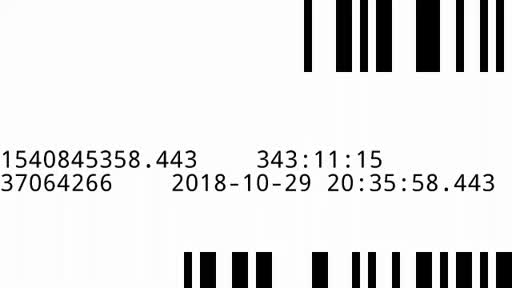

In [9]:
sleep(2) # Bit of delay after pairing

tmpImagePath = "/tmp/image_%s.jpg" % deviceId
api.Devices.get_state_image(deviceId, tmpImagePath)
Image(tmpImagePath)

# Setting stream parameters

In [10]:
api.Devices.run_command(deviceId, "setparam:bitrate=%d" % 1024)  # 1 Mbit/s
api.Devices.run_command(deviceId, 'setparam:resolution=%s' % "640x360")

devTelemetry = api.Devices.get(deviceId)["Telemetry"]
if "settings" in devTelemetry:
    printAsHtmlTable(devTelemetry["settings"].values(), ["id", "title", "value"])

id,title,value
resolution,Encoder resolution,640x360
bitrate,Encoder bitrate,1024


# Streaming to RTMP
To start RTMP stream, use `rtmp.start` command:

In [11]:
kRTMPUrl = "rtmp://10.1.2.16/live/test"
_ = api.Devices.run_command(deviceId, "rtmp.start:%s" % kRTMPUrl)

*Hint: ffmpeg can be used as a local RTMP server:*
```
# Accept rtmp stream and print packets info:
ffprobe -show_packets -print_format csv -rtmp_listen 1 rtmp://0.0.0.0/live/test
```

## Getting RMTP stream status

Device reports its status every 30 seconds and after receiving a command. To get the most recent device status, send `nop` command: device will do nothing, but it will force status submission.

In [12]:
sleep(5) # Let it start

api.Devices.run_command(deviceId, "nop")
rtmp_status = api.Devices.get(deviceId)["Telemetry"]["state"]["rtmp"]
print(json.dumps(rtmp_status, indent=4))

{
    "url": "rtmp://10.1.2.16/live/test", 
    "speed": 1.2999999523162842, 
    "bitrate": 524.4000244140625, 
    "sent": {
        "frames": 21, 
        "bytes": 44032
    }
}


## Stopping RTMP streaming

In [13]:
_ = api.Devices.run_command(deviceId, "rtmp.stop")

# Unpairing the device:

In [14]:
api.Devices.delete(deviceId)
printDevices(api.Devices.get_all())

Id,Model,Name,Status
